In [6]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 7.6 MB/s eta 0:00:00


In [7]:
import pandas as pd
import sweetviz
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as ex

# Ignorar todos los FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


**Lectura e informacion de los datos**
---

In [87]:
data=pd.read_csv('bank-full.csv',sep=';')
data.head()

age           job  marital  education default  balance housing loan car  \
0   58    management  married   tertiary      no     2143     yes   no   1   
1   44    technician   single  secondary      no       29     yes   no   0   
2   33  entrepreneur  married  secondary      no        2     yes  yes   1   
3   47   blue-collar  married    unknown      no     1506     yes   no   1   
4   33       unknown   single    unknown      no        1      no   no   0   

   contact  day month  duration  campaign  pdays  previous poutcome subscribed  
0  unknown    5   may       261         1     -1         0  unknown         no  
1  unknown    5   may       151         1     -1         0  unknown         no  
2  unknown    5   may        76         1     -1         0  unknown         no  
3  unknown    5   may        92         1     -1         0  unknown         no  
4  unknown    5   may       198         1     -1         0  unknown         no

Vemos las columnas de las que disponemos, el tipo de dato que tienen asociado y el numero de valores no-nulos.

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         49732 non-null  int64 
 1   job         49732 non-null  object
 2   marital     49732 non-null  object
 3   education   49732 non-null  object
 4   default     49732 non-null  object
 5   balance     49732 non-null  int64 
 6   housing     49732 non-null  object
 7   loan        49732 non-null  object
 8   car         49643 non-null  object
 9   contact     49732 non-null  object
 10  day         49732 non-null  int64 
 11  month       49732 non-null  object
 12  duration    49732 non-null  int64 
 13  campaign    49732 non-null  int64 
 14  pdays       49732 non-null  int64 
 15  previous    49732 non-null  int64 
 16  poutcome    49732 non-null  object
 17  subscribed  49732 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.8+ MB


# Análisis estadístico de los datos


In [90]:
print(data.nunique())

age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
car              3
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
subscribed       2
dtype: int64


La variable balance se corresponde con el saldo promedio anual, deberiamos agruparlo en intervalos, para evitar el efecto de los outliers y procedemos de la misma manera con la variable duration y pdays.

## a) Descriptive stactistics

Disponemos de 49.732 observaciones con 18 Atributos (Variables).

In [91]:
data.shape

(49732, 18)

## Descripción de la variable objetivo

Estudiemos la estructura y características de la variable objetivo 'subscribed'. Esta puede tomar dos valores 'yes' o 'no'.

Clasificacion de observacion en la variable objetivo ( subscribed)
--------------------------------------------------
subscribed
no     43922
yes     5810
Name: count, dtype: int64

 Gráfico
--------------------------------------------------


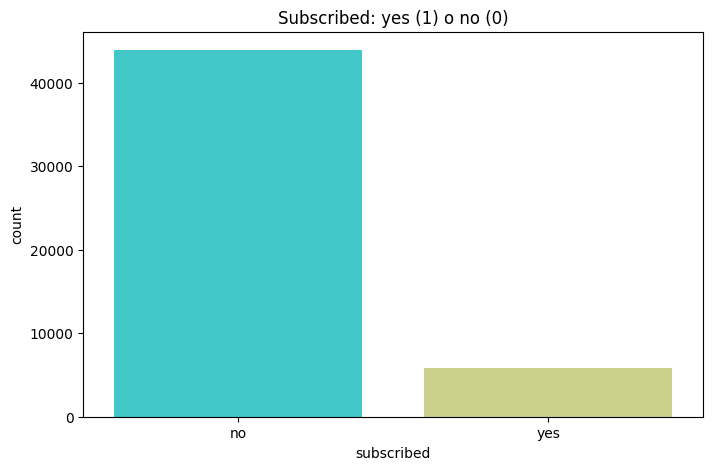

In [92]:
print('Clasificacion de observacion en la variable objetivo ( subscribed)')
print('-'*50)
print(data['subscribed'].value_counts())
print('\n Gráfico')
print('-'*50)
plt.figure(figsize=(8,5))
sns.countplot(x='subscribed',data=data, palette='rainbow')
plt.title("Subscribed: yes (1) o no (0)")
plt.show()

Falta unir grafico anterior con quesito

In [93]:
fig = ex.pie(data,names='subscribed')
fig.update_layout(title='Proporción de observaciones de cada clase (0, 1)')
fig.show()

La muestra está un poco desbalanceada. Deberemos emplear técncias de oversampling para poder realizar redicciones precisas.

In [94]:
data.describe()

age        balance           day      duration      campaign  \
count  49732.000000   49732.000000  49732.000000  49732.000000  49732.000000   
mean      40.957472    1367.761562     15.816315    258.690179      2.766549   
std       10.615008    3041.608766      8.315680    257.743149      3.099075   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    320.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  49732.000000  49732.000000  
mean      40.158630      0.576892  
std      100.127123      2.254838  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

En esta descripción sólo aparecen aquellas variables que son numéricas.
Para tratar las categóricas tenemos que hacerlo de forma distinta.


In [95]:
cat=[] #variables categóricas
num=[] #variables numéricas
for i in data.columns:
  if data[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'car', 'contact', 'month', 'poutcome', 'subscribed']
num =  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


## Descripción de las variables numéricas (boxplot)

Hacemos un boxplot para analizar gráficamente los valores de las variables numéricas.

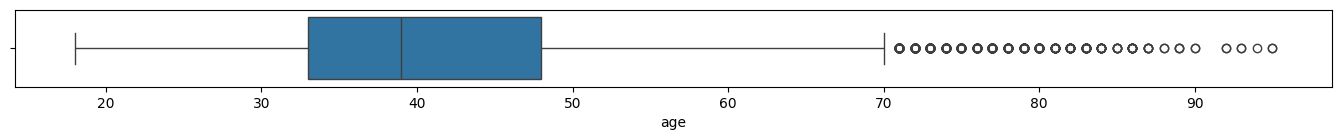

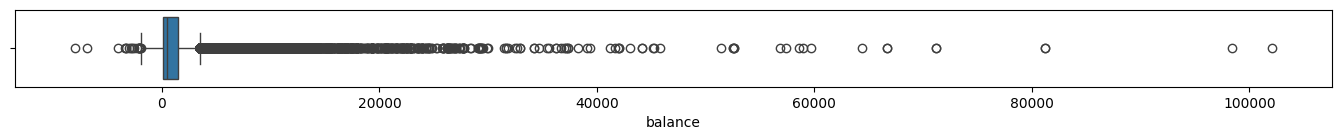

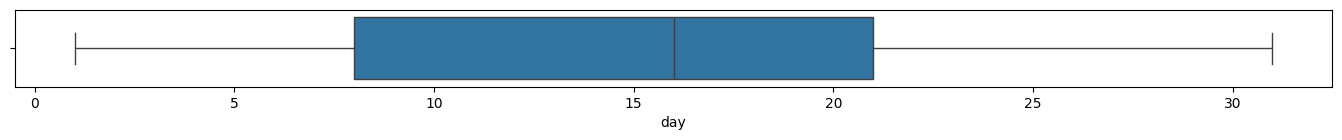

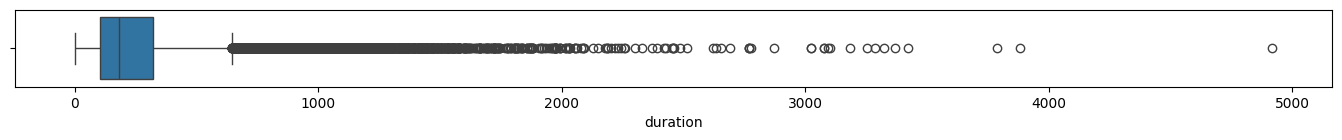

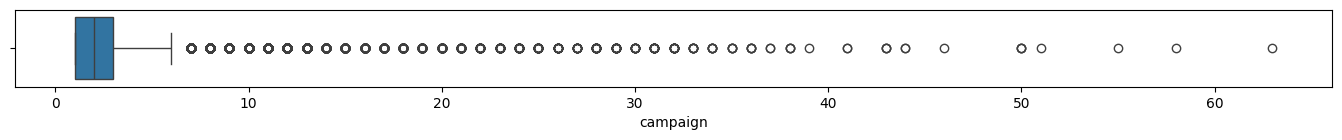

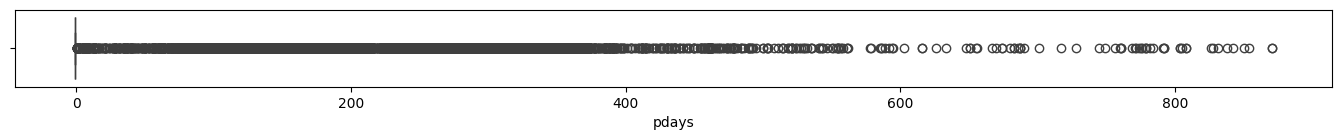

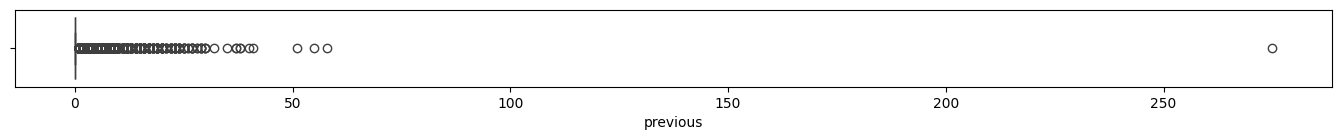

In [96]:
for column in data[num]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data[num], x=column)

Análisis de los Boxplots
Age:vemos que hay un grupo de personas mayores de 70 años que los consiedera outliers, aunque sin llegar a ser un número representativo de la muestra. Parece una variable con una ligera asimetría a la derecha.
Balance: se puede ver que hay una gran cantidad de datos atípicos (saldos bastante elevados), aunque la gran mayoria de clientes presentan saldos muy similares.
Day: vemos que es una distribución bastante simétrica y nos informa que los clientes suelen ser contactados durante la quincena central del mes.
Duration: presenta bastantes valores atípicos. Como norma general tiempo de cada llamada no supera los 10 min.
Campaign: presenta pocos valores atípicos. Se observa que no se suele contactar con un cliente más de 5 veces durante la campaña actual.
Pdays: a primera vista es un gráfico que llama bastante la atención. Todos los valores de la caja coinciden con 0. Viendo ahora el significado de esta variable, nos damos cuenta que el motivo puede ser que la gran mayoría de clientes nunca han sido contactados en la campaña anterior.
Previous: comentario similar al anterior.


Análisis boxplot
Age:
Balance:
Day:
Duration:
Campaign:
Pdays:
Previous:

Fonsi comenta estos graficos

Ahora hacemos un análisis descritivo de las variables categóricas de la misma forma que lo hemos hecho para la variable objetivo.

## Descripción de las variables categóricas


Descripcion de la variable  job
--------------------------------------------------
Categorías:
job
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: count, dtype: int64
Número de categorias:  12


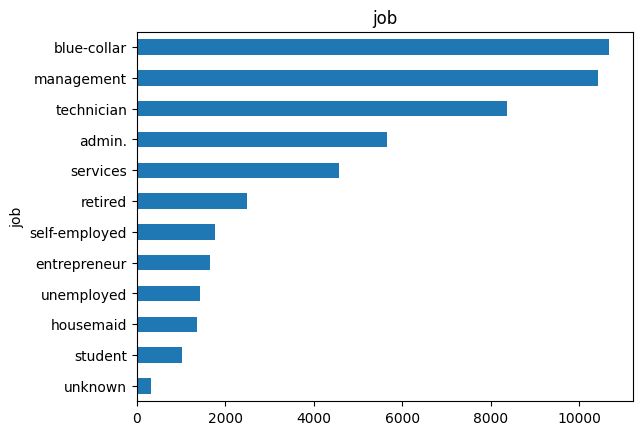


Descripcion de la variable  marital
--------------------------------------------------
Categorías:
marital
married     30011
single      13986
divorced     5735
Name: count, dtype: int64
Número de categorias:  3


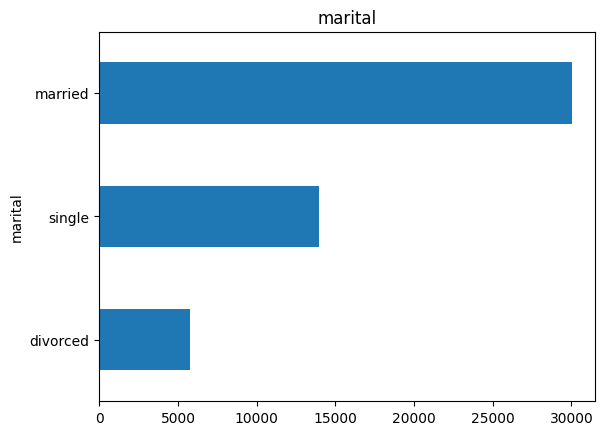


Descripcion de la variable  education
--------------------------------------------------
Categorías:
education
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: count, dtype: int64
Número de categorias:  4


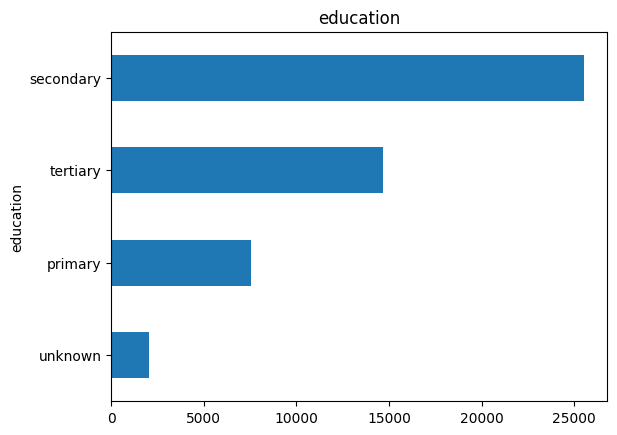


Descripcion de la variable  default
--------------------------------------------------
Categorías:
default
no     48841
yes      891
Name: count, dtype: int64
Número de categorias:  2


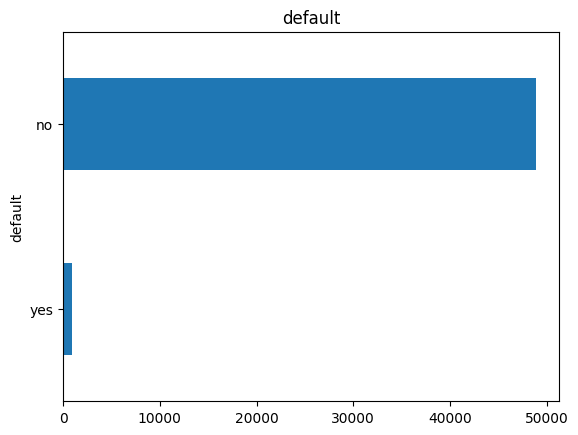


Descripcion de la variable  housing
--------------------------------------------------
Categorías:
housing
yes    27689
no     22043
Name: count, dtype: int64
Número de categorias:  2


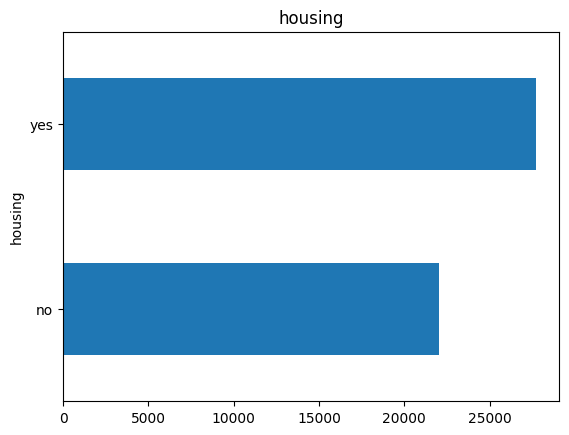


Descripcion de la variable  loan
--------------------------------------------------
Categorías:
loan
no     41797
yes     7935
Name: count, dtype: int64
Número de categorias:  2


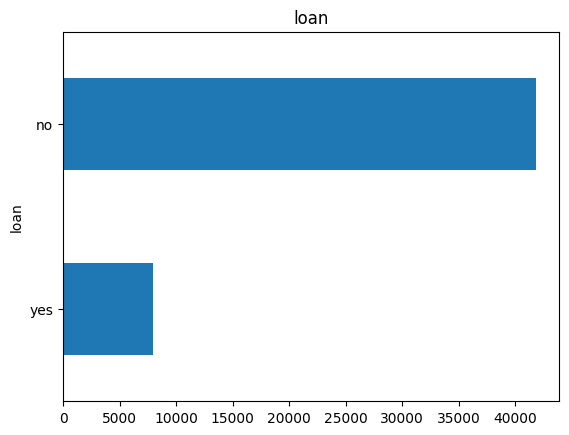


Descripcion de la variable  car
--------------------------------------------------
Categorías:
car
1          29982
0          13946
unknown     5715
Name: count, dtype: int64
Número de categorias:  3


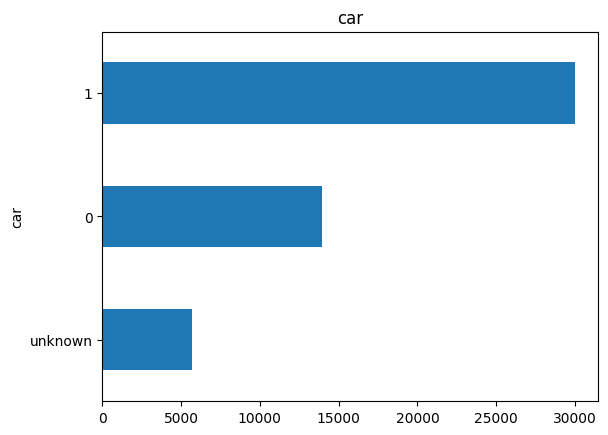


Descripcion de la variable  contact
--------------------------------------------------
Categorías:
contact
cellular     32181
unknown      14344
telephone     3207
Name: count, dtype: int64
Número de categorias:  3


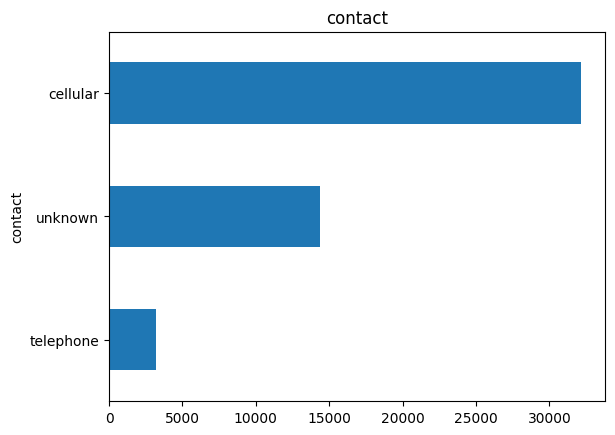


Descripcion de la variable  month
--------------------------------------------------
Categorías:
month
may    15164
jul     7601
aug     6880
jun     5872
nov     4359
apr     3225
feb     2871
jan     1551
oct      818
sep      631
mar      526
dec      234
Name: count, dtype: int64
Número de categorias:  12


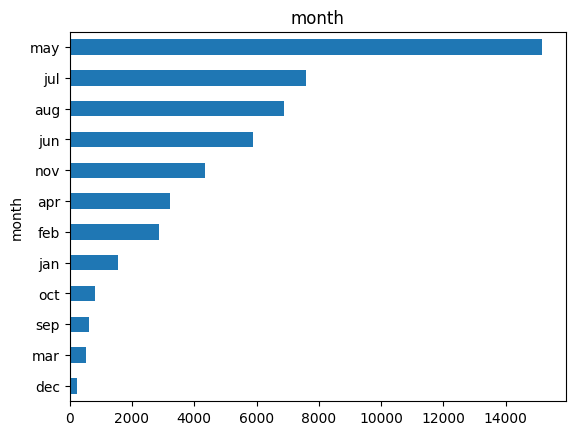


Descripcion de la variable  poutcome
--------------------------------------------------
Categorías:
poutcome
unknown    40664
failure     5391
other       2037
success     1640
Name: count, dtype: int64
Número de categorias:  4


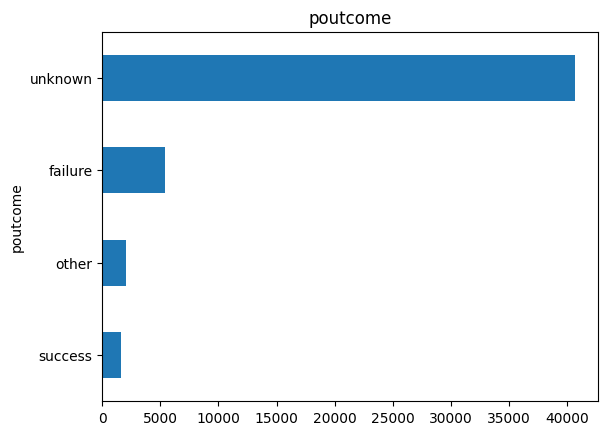


Descripcion de la variable  subscribed
--------------------------------------------------
Categorías:
subscribed
no     43922
yes     5810
Name: count, dtype: int64
Número de categorias:  2


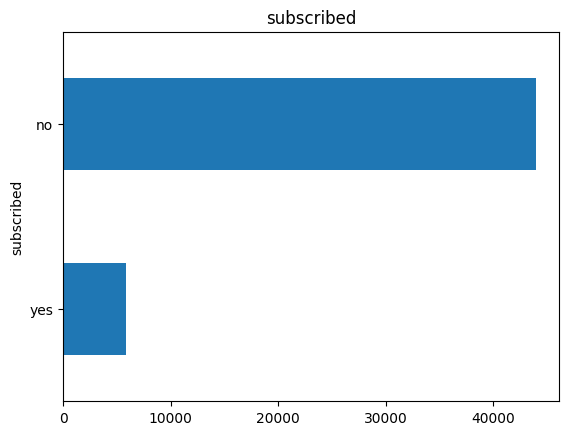

In [97]:
for i in data.columns: # bucle para todas las columnas del dataframe
    if data[i].dtypes == 'object': #condición que debe cumplirse (que sean del tipo 'object')
        print('\nDescripcion de la variable ',i)
        print('-'*50)
        print('Categorías:')
        print(data[i].value_counts())
        print('Número de categorias: ',data[i].nunique())
        data[i].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
        plt.title(i)
        plt.show()


Separamos las variables predictoras de la variable objetivo.

In [98]:
X = data[list(data.columns[1:data.shape[1]])] #todas las variables menos la variable respuesta
y = data['subscribed']

## Mátriz de correlacion de las variables numéricas

<Axes: >

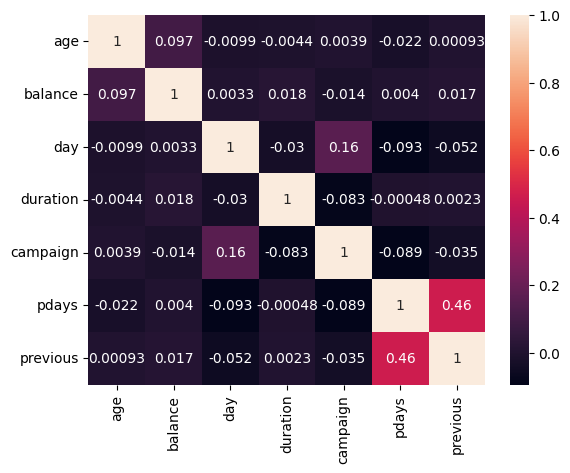

In [99]:
sns.heatmap(data[num].corr(),annot=True)

## Distribución de las variables numéricas (histogramas)

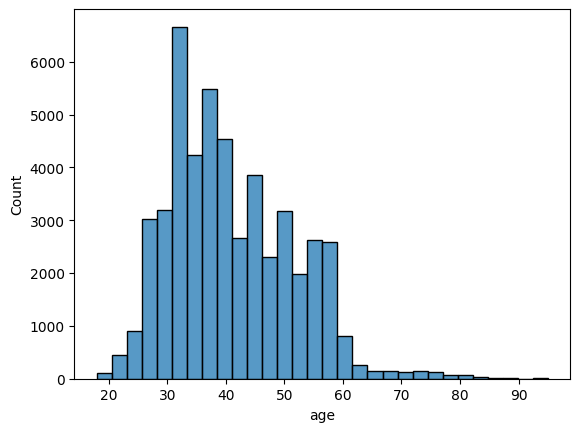

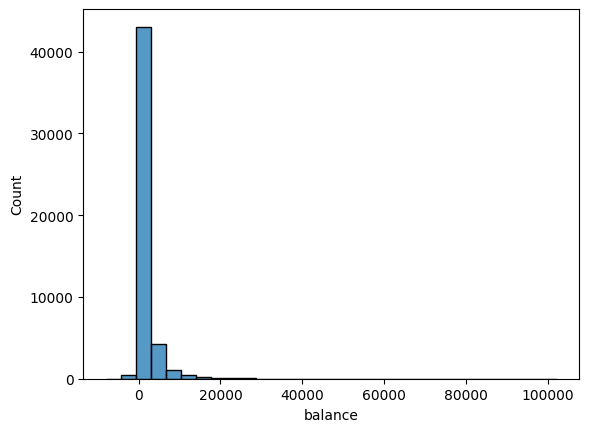

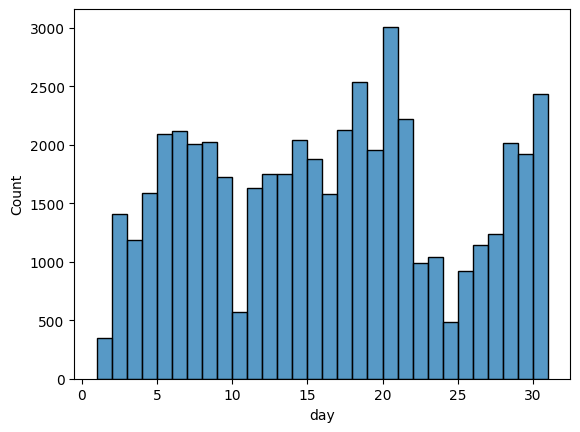

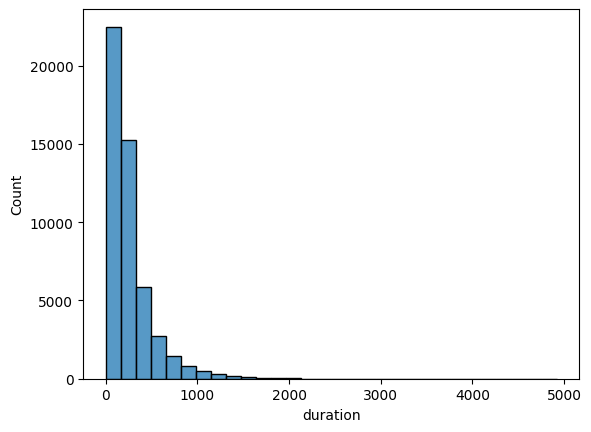

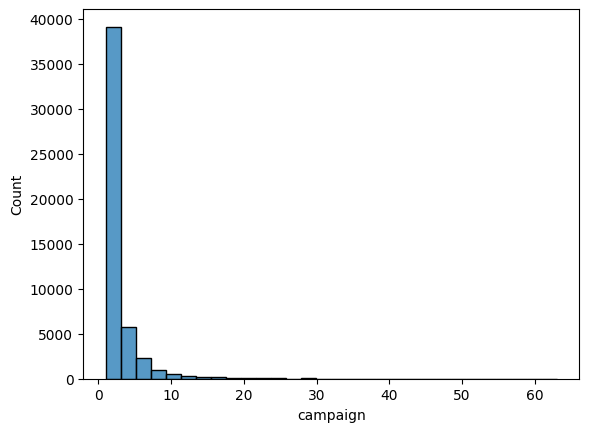

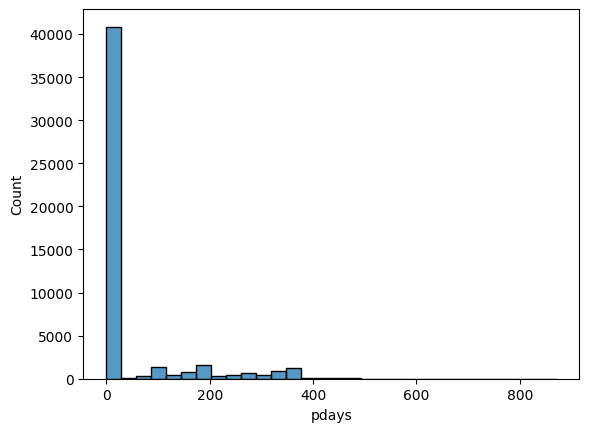

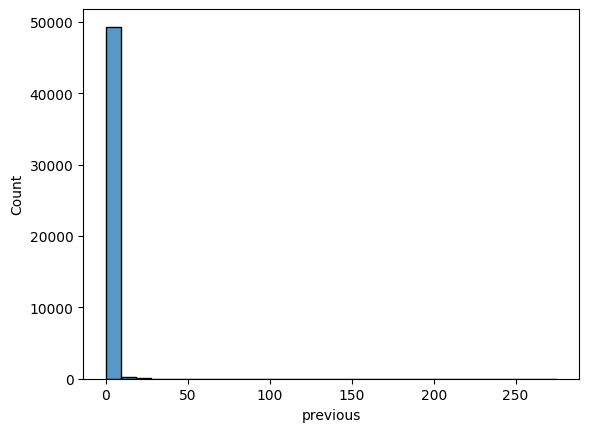

In [100]:
for n in num:
    sns.histplot(x=n,data=data,bins=30)
    plt.show()

Interpretacion de los histogramas:
- **Age** : Se asemeja a una distribución normal
- **Balance** : Hay que agrupar en intervalos
- **Day** : Podría ser interesante sustituir los valores numéricos por dia de la semana (Lunes, Martes...)
- **Duration, Campaign, pdays, previous**  : Se observa la presencia de outliers

## Diagramas de dispersion

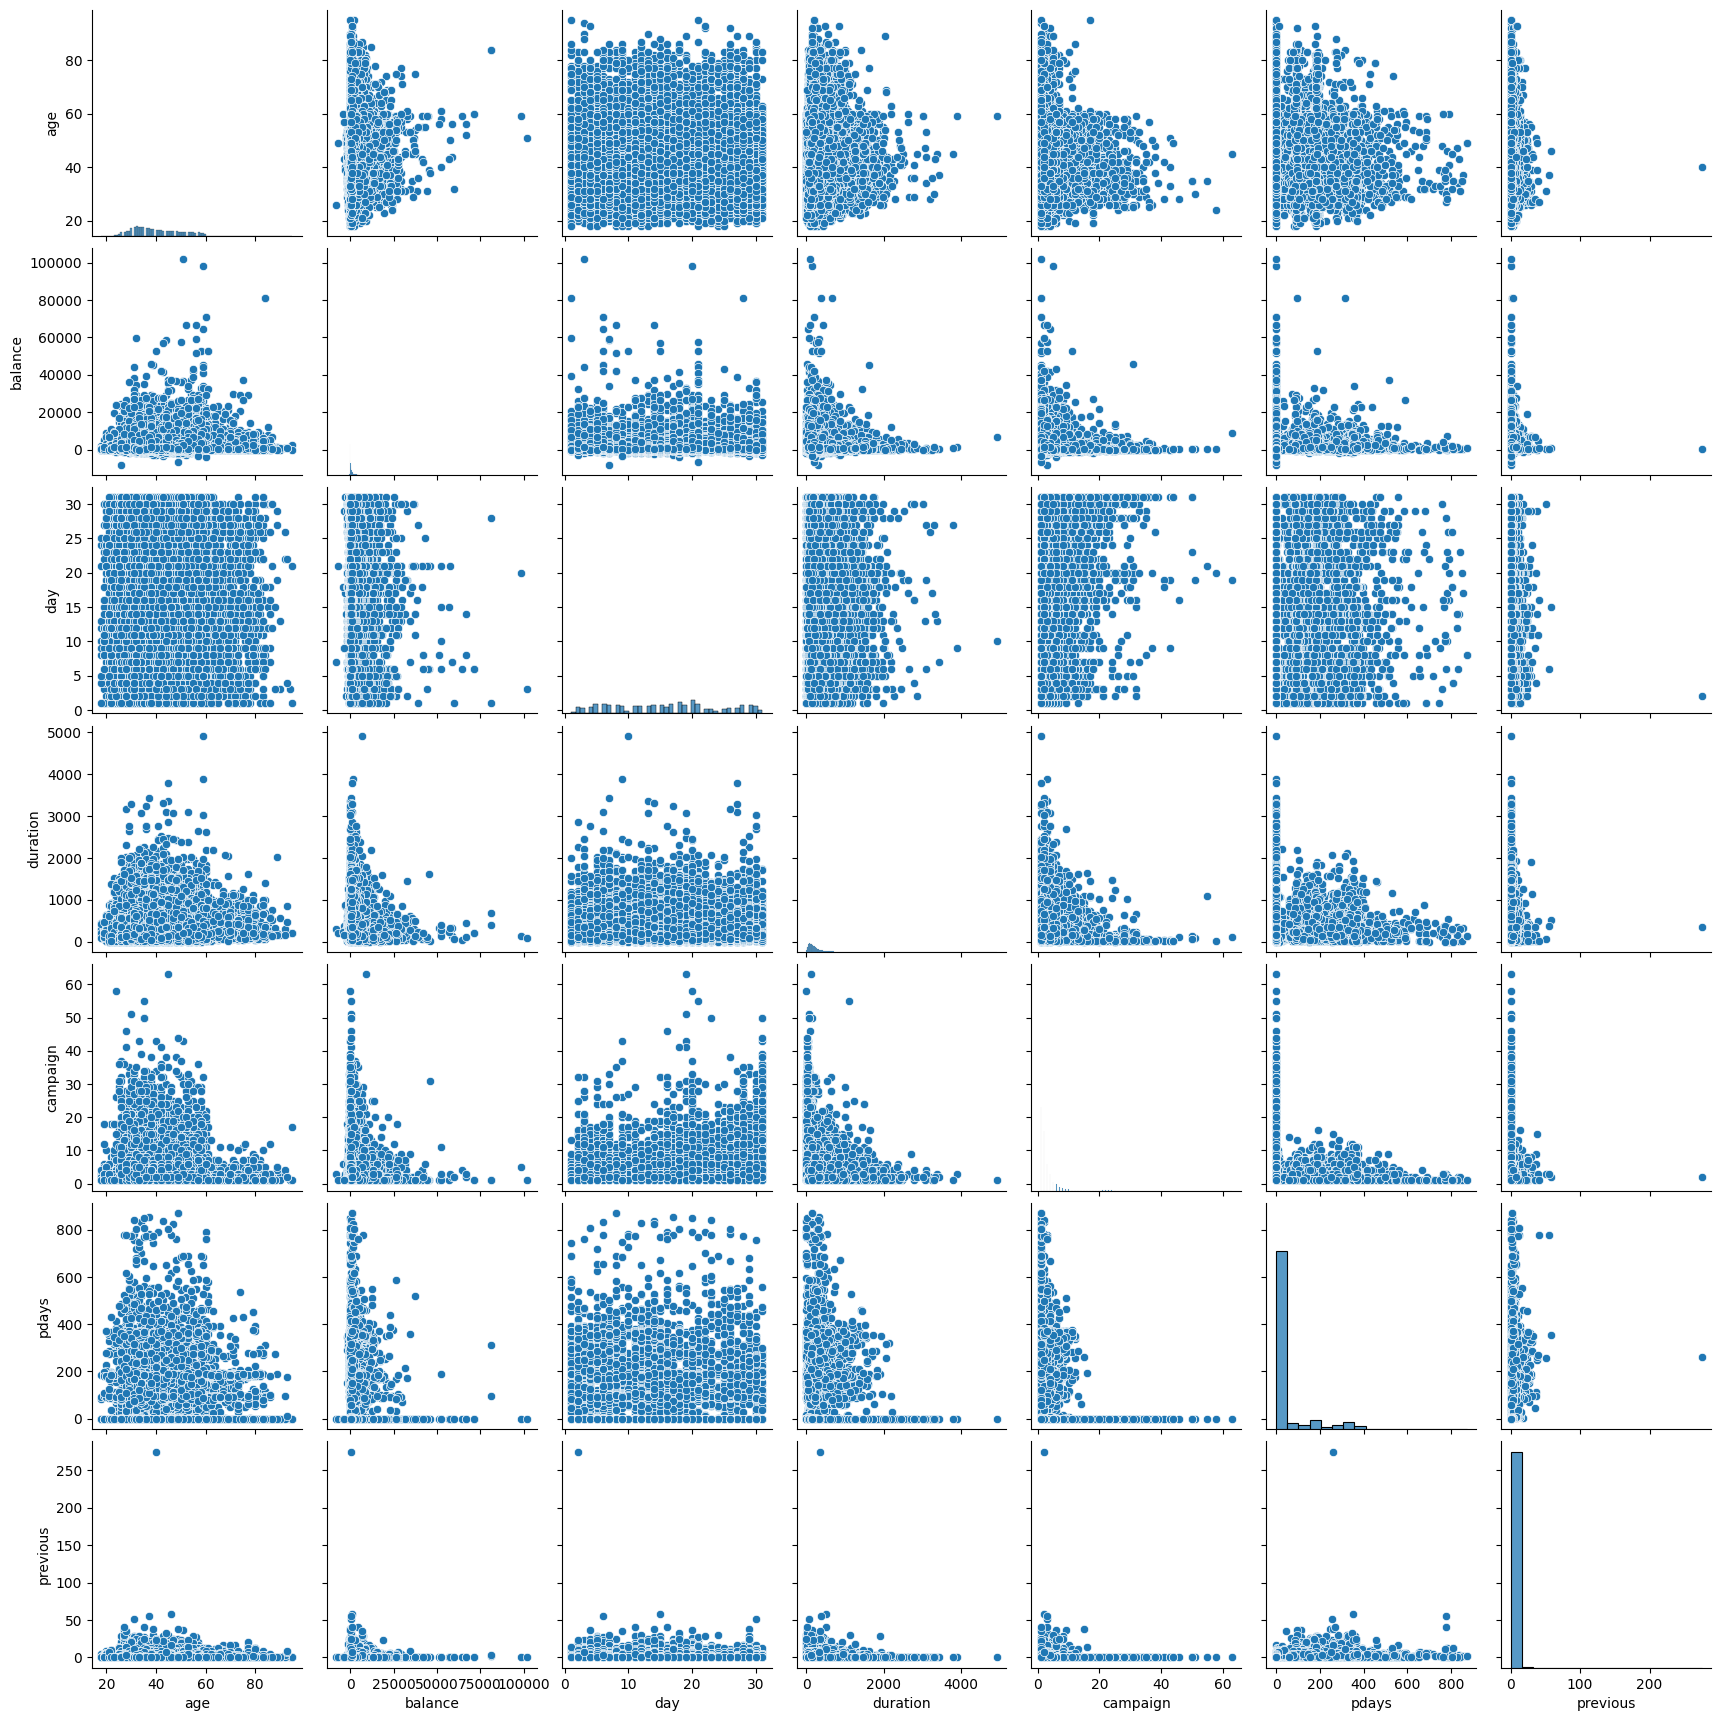

In [101]:
sns.pairplot(data[num])

## Valores nulos

In [102]:
print('Columnas con valores nulos: ')
data.isna().sum() /len(data)

Columnas con valores nulos: 


age           0.00000
job           0.00000
marital       0.00000
education     0.00000
default       0.00000
balance       0.00000
housing       0.00000
loan          0.00000
car           0.00179
contact       0.00000
day           0.00000
month         0.00000
duration      0.00000
campaign      0.00000
pdays         0.00000
previous      0.00000
poutcome      0.00000
subscribed    0.00000
dtype: float64

Observando que tenemos un 0,18% de nulos en la columna car y que además se trata de una variable categórica binaria, consideramos que eliminar dichos valores seria la opcion adecuada.

## B) Data Cleaning

In [103]:
### Clean balance Column

balance_min = data['balance'].min()
balance_q1 = data['balance'].quantile(0.25)
balance_q2 = data['balance'].quantile(0.5)
balance_q3 = data['balance'].quantile(0.75)
balance_max = data['balance'].max()

print("Min:", balance_min)
print("Q1 (25th percentile):", balance_q1)
print("Q2 (50th percentile):", balance_q2)
print("Q3 (75th percentile):", balance_q3)
print("Max:", balance_max)

Min: -8019
Q1 (25th percentile): 72.0
Q2 (50th percentile): 448.0
Q3 (75th percentile): 1431.0
Max: 102127


Se propone crear los siguientes buckets
1. Negativo
2. Entre 0 inclusivo y 500 exclusivo
3. Entre 500 inclusivo y 1000 exclusivo
4. Entre 1000 inclusivo y 1500  Exclusivo
5. Mas de 1500


In [104]:
conditions = [
    data['balance'] < 0,
    (data['balance'] >= 0) & (data['balance'] < 100),
    (data['balance'] >= 100) & (data['balance'] < 500),
    (data['balance'] >= 500) & (data['balance'] < 1000),
    (data['balance'] >= 1000) & (data['balance'] < 1500),
    (data['balance'] >= 1500)
]

choices = ['negativo', '0-100', '100-500','500-1000', '1000-1500', ' > 1500']

data['balance'] = np.select(conditions, choices, default='Other')

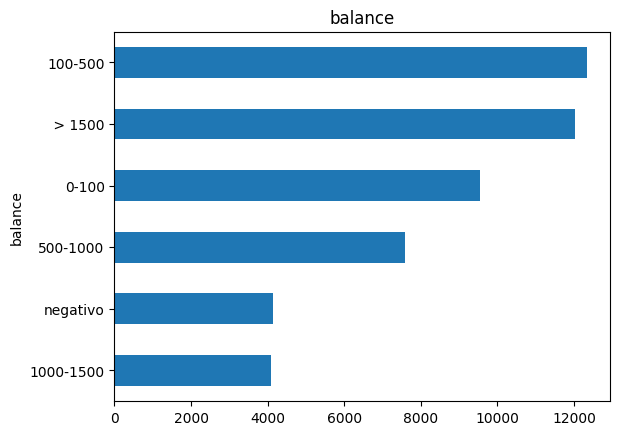

In [105]:
data["balance"].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title("balance")
plt.show()

In [106]:
### Clean Duration

duration_min = data['duration'].min()
duration_q1 = data['duration'].quantile(0.25)
duration_q2 = data['duration'].quantile(0.5)
duration_q3 = data['duration'].quantile(0.75)
duration_max = data['duration'].max()

print("Min:", duration_min)
print("Q1 (25th percentile):", duration_q1)
print("Q2 (50th percentile):", duration_q2)
print("Q3 (75th percentile):", duration_q3)
print("Max:", duration_max)


Min: 0
Q1 (25th percentile): 103.0
Q2 (50th percentile): 180.0
Q3 (75th percentile): 320.0
Max: 4918


In [107]:
# Se recalcula la variable a minutos
data['duration'] = data['duration']/60

In [108]:
duration_min = data['duration'].min()
duration_q1 = data['duration'].quantile(0.25)
duration_q2 = data['duration'].quantile(0.5)
duration_q3 = data['duration'].quantile(0.75)
duration_max = data['duration'].max()

print("Min:", duration_min)
print("Q1 (25th percentile):", duration_q1)
print("Q2 (50th percentile):", duration_q2)
print("Q3 (75th percentile):", duration_q3)
print("Max:", duration_max)

Min: 0.0
Q1 (25th percentile): 1.7166666666666666
Q2 (50th percentile): 3.0
Q3 (75th percentile): 5.333333333333333
Max: 81.96666666666667


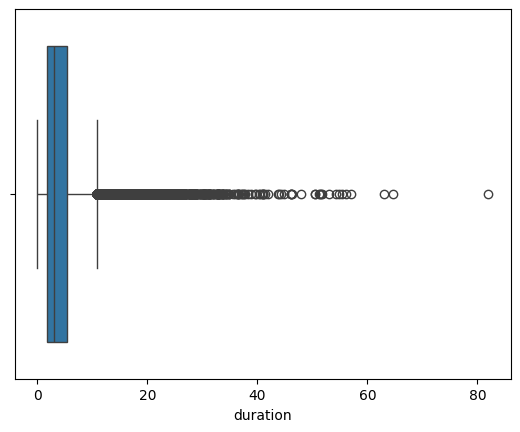

In [109]:
sns.boxplot(data=data, x="duration")
plt.show()

Se propone crear los siguientes buckets
1. Menos de 5 minutos inclusivo
2. Entre 5 exclusivo y 10 minutos inclusivo
3. Mas de 10 minutos


In [110]:
conditions = [
    (data['duration'] >= 0) & (data['duration'] < 5),
    (data['duration'] >= 5) & (data['duration'] < 10),
    (data['duration'] > 10)
]

choices = ['<5', '5 - 10', '10>0 ']

data['duration'] = np.select(conditions, choices, default='Other')

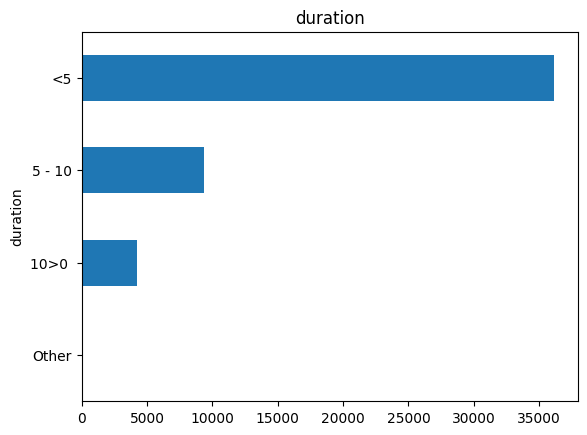

In [111]:
data["duration"].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title("duration")
plt.show()

In [112]:
# Clean Pdays

pdays_min = data['pdays'].min()
pdays_q1 = data['pdays'].quantile(0.25)
pdays_q2 = data['pdays'].quantile(0.5)
pdays_q3 = data['pdays'].quantile(0.75)
pdays_max = data['pdays'].max()

print("Min:", duration_min)
print("Q1 (25th percentile):", pdays_q1)
print("Q2 (50th percentile):", pdays_q2)
print("Q3 (75th percentile):", pdays_q3)
print("Max:", pdays_max)


Min: 0.0
Q1 (25th percentile): -1.0
Q2 (50th percentile): -1.0
Q3 (75th percentile): -1.0
Max: 871


In [113]:
# Se hace una variable boolean 1 si fue contactado 0 si no fue contactado

data['pdays'] = np.where(data['pdays'] == -1, 0, 1)

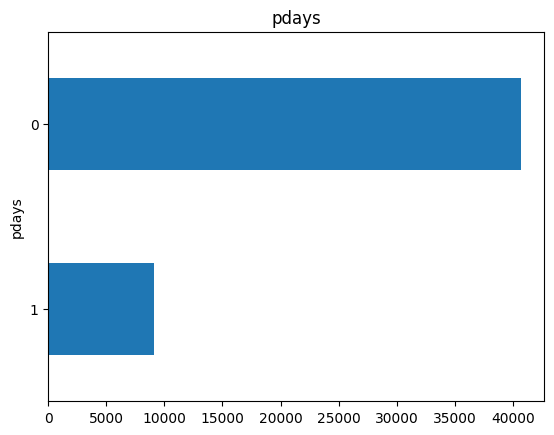

In [114]:
data["pdays"].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title("pdays")
plt.show()

In [115]:
# Clean Previous

previous_min = data['previous'].min()
previous_q1 = data['previous'].quantile(0.25)
previous_q2 = data['previous'].quantile(0.5)
previous_q3 = data['previous'].quantile(0.75)
previous_max = data['previous'].max()

print("Min:", previous_min)
print("Q1 (25th percentile):", previous_q1)
print("Q2 (50th percentile):", previous_q2)
print("Q3 (75th percentile):", previous_q3)
print("Max:", previous_max)


Min: 0
Q1 (25th percentile): 0.0
Q2 (50th percentile): 0.0
Q3 (75th percentile): 0.0
Max: 275


In [116]:
# Crear boolean, si previous es 0 entonces no fue contactado, de otra manera utilizar un 1
data['previous'] = np.where(data['previous'] == 0, 0, 1)

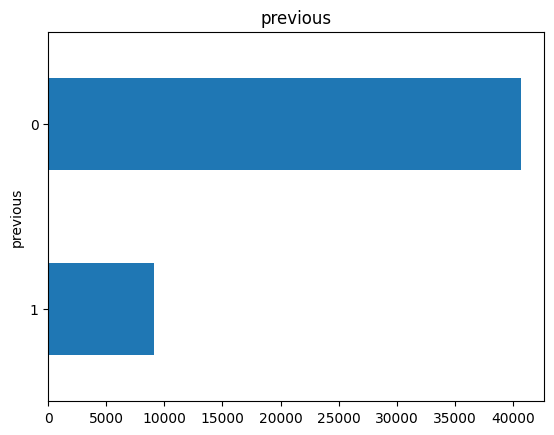

In [117]:
data["previous"].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title("previous")
plt.show()

In [118]:
# Remove observations where car is missing

In [119]:
#ENTREGA 1

# Reducción dimensionalidad

In [120]:
cat=[]
num=[]
for i in data.columns:
  if data[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'car', 'contact', 'month', 'duration', 'poutcome', 'subscribed']
num =  ['age', 'day', 'campaign', 'pdays', 'previous']


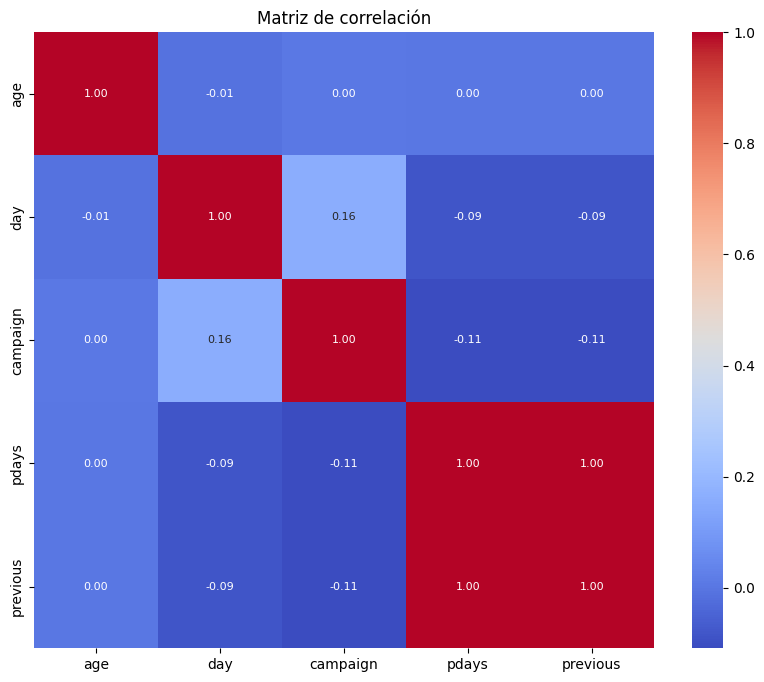

In [121]:
# Calcular la matriz de correlación
correlation_matrix = data[num].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matriz de correlación')
plt.show()

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_data = data[num]

def estandariza(data_features):
    data_features = (data_features - data_features.mean()) /   data_features.std()
    return data_features

In [123]:
dfvif_estan = numeric_data.apply(estandariza, axis=0)
dfvif_estan.head()

age       day  campaign     pdays  previous
0  1.605513 -1.300713 -0.570025 -0.472381 -0.472381
1  0.286625 -1.300713 -0.570025 -0.472381 -0.472381
2 -0.749644 -1.300713 -0.570025 -0.472381 -0.472381
3  0.569244 -1.300713 -0.570025 -0.472381 -0.472381
4 -0.749644 -1.300713 -0.570025 -0.472381 -0.472381

In [124]:
vif_estan = [[dfvif_estan.columns[i], variance_inflation_factor(dfvif_estan.to_numpy(), i)] for i in range(numeric_data.shape[1])]
df_vif_estan=pd.DataFrame(vif_estan)
df_vif_estan=df_vif_estan.rename(columns = {0:'Variable',1:'VIF'})
df_vif_estan

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Variable       VIF
0       age  1.000132
1       day  1.032070
2  campaign  1.036781
3     pdays       inf
4  previous       inf

In [125]:
data

age            job  marital  education default    balance housing loan  \
0       58     management  married   tertiary      no     > 1500     yes   no   
1       44     technician   single  secondary      no      0-100     yes   no   
2       33   entrepreneur  married  secondary      no      0-100     yes  yes   
3       47    blue-collar  married    unknown      no     > 1500     yes   no   
4       33        unknown   single    unknown      no      0-100      no   no   
...    ...            ...      ...        ...     ...        ...     ...  ...   
49727   33       services  married  secondary      no   negativo     yes   no   
49728   57  self-employed  married   tertiary     yes   negativo     yes  yes   
49729   57     technician  married  secondary      no    100-500      no   no   
49730   28    blue-collar  married  secondary      no  1000-1500      no   no   
49731   44   entrepreneur   single   tertiary      no  1000-1500     yes  yes   

      car   contact  day month duration  campaign  pdays  previous poutcome  \
0       1   unknown    5   may       <5         1      0         0  unknown   
1       0   unknown    5   may       <5         1      0         0  unknown   
2       1   unknown    5   may       <5         1      0         0  unknown   
3       1   unknown    5   may       <5         1      0         0  unknown   
4       0   unknown    5   may       <5         1      0         0  unknown   
...    ..       ...  ...   ...      ...       ...    ...       ...      ...   
49727   1  cellular   30   jul   5 - 10         5      0         0  unknown   
49728   1   unknown    9   may       <5         1      0         0  unknown   
49729   1  cellular   19   aug       <5        11      0         0  unknown   
49730   1  cellular    6   feb       <5         4      1         1    other   
49731   0  cellular    3   apr   5 - 10         2      1         1    other   

      subscribed  
0             no  
1             no  
2             no  
3             no  
4             no  
...          ...  
49727         no  
49728         no  
49729         no  
49730         no  
49731         no  

[49732 rows x 18 columns]

In [126]:
distinct_months = data['month'].unique()

# Mostrar los distintos valores de la columna 'month'
print("Distintos valores en la columna 'month':")
print(distinct_months)

Distintos valores en la columna 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [127]:
from datetime import datetime
meses_dict = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Función para obtener el nombre del día de la semana
def get_weekday_name(day, month):
    # Asumimos que las fechas son del año 2021
    year = 2021
    month_num = meses_dict[month.lower()]  # Convierte el nombre del mes a número
    date_obj = datetime(year, month_num, day)
    return date_obj.strftime('%A')  # Devuelve el nombre completo del día de la semana

# Aplicar la función a las filas del DataFrame para crear la nueva columna 'dia_semana'
data['dia_semana'] = data.apply(lambda row: get_weekday_name(row['day'], row['month']), axis=1)

In [128]:
data

age            job  marital  education default    balance housing loan  \
0       58     management  married   tertiary      no     > 1500     yes   no   
1       44     technician   single  secondary      no      0-100     yes   no   
2       33   entrepreneur  married  secondary      no      0-100     yes  yes   
3       47    blue-collar  married    unknown      no     > 1500     yes   no   
4       33        unknown   single    unknown      no      0-100      no   no   
...    ...            ...      ...        ...     ...        ...     ...  ...   
49727   33       services  married  secondary      no   negativo     yes   no   
49728   57  self-employed  married   tertiary     yes   negativo     yes  yes   
49729   57     technician  married  secondary      no    100-500      no   no   
49730   28    blue-collar  married  secondary      no  1000-1500      no   no   
49731   44   entrepreneur   single   tertiary      no  1000-1500     yes  yes   

      car   contact  day month duration  campaign  pdays  previous poutcome  \
0       1   unknown    5   may       <5         1      0         0  unknown   
1       0   unknown    5   may       <5         1      0         0  unknown   
2       1   unknown    5   may       <5         1      0         0  unknown   
3       1   unknown    5   may       <5         1      0         0  unknown   
4       0   unknown    5   may       <5         1      0         0  unknown   
...    ..       ...  ...   ...      ...       ...    ...       ...      ...   
49727   1  cellular   30   jul   5 - 10         5      0         0  unknown   
49728   1   unknown    9   may       <5         1      0         0  unknown   
49729   1  cellular   19   aug       <5        11      0         0  unknown   
49730   1  cellular    6   feb       <5         4      1         1    other   
49731   0  cellular    3   apr   5 - 10         2      1         1    other   

      subscribed dia_semana  
0             no  Wednesday  
1             no  Wednesday  
2             no  Wednesday  
3             no  Wednesday  
4             no  Wednesday  
...          ...        ...  
49727         no     Friday  
49728         no     Sunday  
49729         no   Thursday  
49730         no   Saturday  
49731         no   Saturday  

[49732 rows x 19 columns]

Frecuencia dia de la semana
--------------------------------------------------
dia_semana
Friday       10487
Thursday      9807
Saturday      9493
Wednesday     8971
Sunday        5914
Tuesday       4452
Monday         608
Name: count, dtype: int64

 Gráfico
--------------------------------------------------


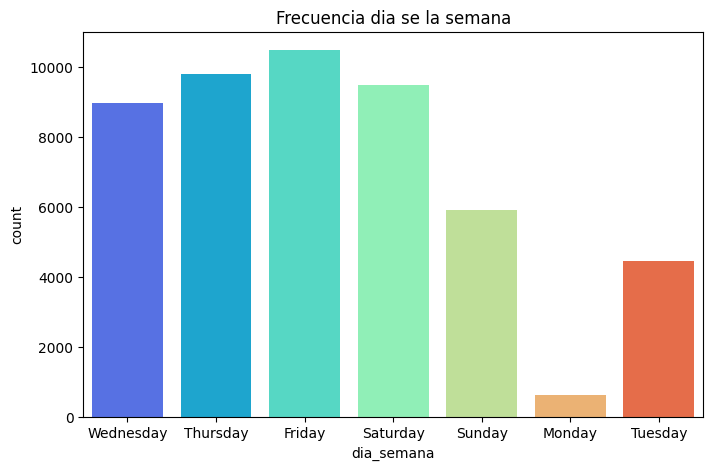

In [129]:
print('Frecuencia dia de la semana')
print('-'*50)
print(data['dia_semana'].value_counts())
print('\n Gráfico')
print('-'*50)
plt.figure(figsize=(8,5))
sns.countplot(x='dia_semana',data=data, palette='rainbow')
plt.title("Frecuencia dia se la semana")
plt.show()

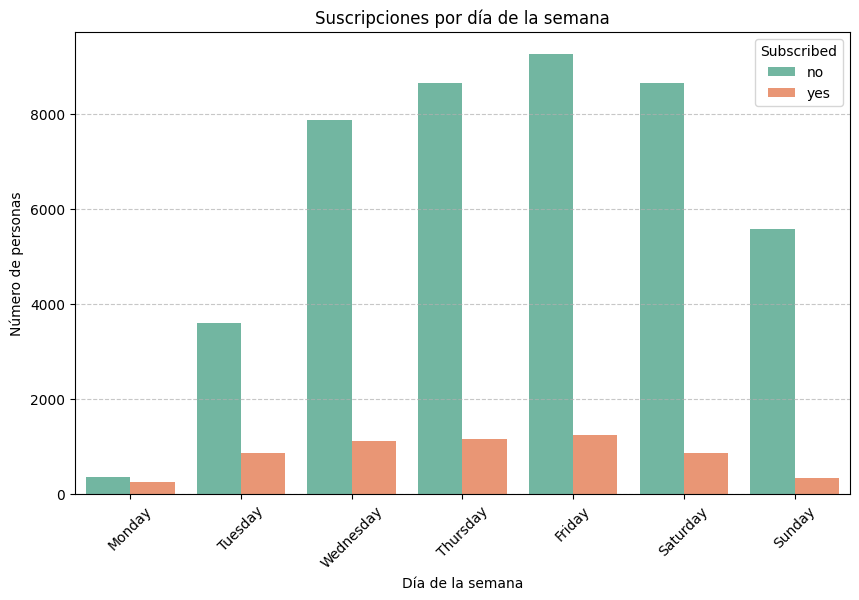

In [130]:
dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordenar los datos según el orden de los días de la semana
data['dia_semana'] = pd.Categorical(data['dia_semana'], categories=dias_semana_ordenados, ordered=True)

# Crear un gráfico de barras (count plot) usando seaborn
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
sns.countplot(data=data, x='dia_semana', hue='subscribed', palette='Set2')  # Crear el count plot
plt.title('Suscripciones por día de la semana')  # Definir el título del gráfico
plt.xlabel('Día de la semana')  # Etiqueta del eje x
plt.ylabel('Número de personas')  # Etiqueta del eje y
plt.legend(title='Subscribed', loc='upper right')  # Agregar leyenda
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula horizontal
plt.show()  # Mostrar el gráfico

# Selección variables

In [131]:
pip install catboost

In [132]:
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier
from datetime import datetime

In [133]:
# Función para obtener el nombre del día de la semana
def get_weekday_name(day, month,year):
    meses_dict = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
    month_num = meses_dict[month.lower()]  # Convierte el nombre del mes a número
    date_obj = datetime(year, month_num, day)
    return date_obj.strftime('%A')  # Devuelve el nombre completo del día de la semana

In [134]:
def cleaning(data):
    cond_balance = [(data['balance'] < 0),(data['balance'] >= 0) & (data['balance'] < 100),(data['balance'] >= 100) & (data['balance'] < 500),(data['balance'] >= 500) & (data['balance'] < 1000),  (data['balance'] >= 1000) & (data['balance'] < 1500),  (data['balance'] >= 1500)]
    cond_duration = [(data['duration'] >= 0) & (data['duration'] < 5),(data['duration'] >= 5) & (data['duration'] < 10),(data['duration'] > 10)]
    choice_balance = ['negativo', '0-100', '100-500','500-1000', '1000-1500', ' > 1500']
    choice_duration = ['<5', '5 - 10', '10>0 ']
    year=2021
    dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    data['balance'] = np.select(cond_balance, choice_balance, default='Other')
    data['duration'] = data['duration']/60
    data['duration'] = np.select(cond_duration, choice_duration, default='Other')
    data['pdays'] = np.where(data['pdays'] == -1, 0, 1)
    data['previous'] = np.where(data['previous'] == 0, 0, 1)
    data['dia_semana'] = data.apply(lambda row: get_weekday_name(row['day'], row['month'],year), axis=1)
    #data['dia_semana'] = pd.Categorical(data['dia_semana'], categories=dias_semana_ordenados, ordered=True)
    data=data[~data['car'].isnull()]
    data=data[~data.duplicated()]
    data['subscribed']=data['subscribed'].map({'yes':1,
                                                 'no':0})
    return data

In [135]:
data=pd.read_csv('bank-full.csv',sep=';')
data_cleaned=cleaning(data)

<Axes: >

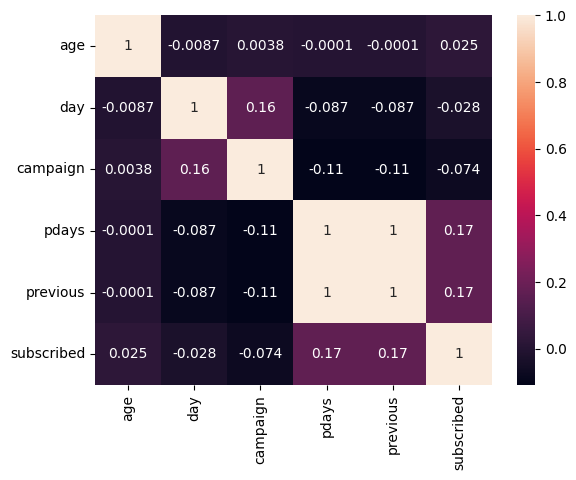

In [136]:
num_cols=data_cleaned.select_dtypes(include='number').columns
sns.heatmap(data_cleaned[num_cols].corr(),annot=True)

In [137]:
data_cleaned.drop('pdays',axis=1,inplace=True)
data_cleaned_cat_num=data_cleaned.copy()    #Para probar seleccion de variables Filter y Wrapper

In [138]:
def cat_to_num(col,objective,data): #Proceso similar al que sigue CatboostClassifier
    dic={}
    for opt in data[col].unique():
        mask=data[col]==opt
        valor=round(data[mask][objective].sum() / len(data[mask]),3)
        dic[opt]=valor

    data[col]=data[col].map(dic)
    data[col]=data[col].astype(float)

In [139]:
cat_cols=data_cleaned.select_dtypes(include=['O']).columns
ids_cat=[id for id,col in enumerate(data_cleaned.columns) if col in cat_cols]

for cl in data_cleaned_cat_num.select_dtypes(include=['O','category']).columns:
    cat_to_num(cl,'subscribed',data_cleaned_cat_num)

In [140]:
y=data_cleaned['subscribed']
X=data_cleaned.drop('subscribed',axis=1)
cat_cols=X.select_dtypes(include=['O']).columns
ids_cat=[id for id,col in enumerate(X.columns) if col in cat_cols]

## CATBOOST

In [141]:
clf=CatBoostClassifier(random_state=0,cat_features=ids_cat)
clf.fit(X,y)

Learning rate set to 0.0522
0:	learn: 0.6469859	total: 122ms	remaining: 2m 2s
1:	learn: 0.6064448	total: 246ms	remaining: 2m 2s
2:	learn: 0.5709997	total: 326ms	remaining: 1m 48s
3:	learn: 0.5423504	total: 383ms	remaining: 1m 35s
4:	learn: 0.5148662	total: 457ms	remaining: 1m 30s
5:	learn: 0.4897130	total: 535ms	remaining: 1m 28s
6:	learn: 0.4707185	total: 564ms	remaining: 1m 19s
7:	learn: 0.4539897	total: 631ms	remaining: 1m 18s
8:	learn: 0.4372650	total: 820ms	remaining: 1m 30s
9:	learn: 0.4234861	total: 1.01s	remaining: 1m 40s
10:	learn: 0.4117763	total: 1.1s	remaining: 1m 39s
11:	learn: 0.4006056	total: 1.16s	remaining: 1m 35s
12:	learn: 0.3915268	total: 1.24s	remaining: 1m 34s
13:	learn: 0.3821306	total: 1.35s	remaining: 1m 35s
14:	learn: 0.3749549	total: 1.4s	remaining: 1m 32s
15:	learn: 0.3692136	total: 1.45s	remaining: 1m 29s
16:	learn: 0.3641453	total: 1.48s	remaining: 1m 25s
17:	learn: 0.3575734	total: 1.57s	remaining: 1m 25s
18:	learn: 0.3530315	total: 1.6s	remaining: 1m 22s

In [142]:
result=pd.DataFrame(zip(clf.feature_importances_,clf.feature_names_),columns=['import','var']).sort_values('import',ascending=False)
result

import         var
11  18.548654       month
10  12.490345         day
15  10.278266    poutcome
9    9.773677     contact
0    8.467729         age
16   6.159403  dia_semana
1    5.407737         job
6    5.073887     housing
5    4.981316     balance
13   4.785846    campaign
3    3.062489   education
12   3.042698    duration
8    1.988884         car
2    1.973000     marital
7    1.589843        loan
4    1.555757     default
14   0.820470    previous

Las características más importantes son 'month', 'day', 'poutcome', 'contact', 'age', 'dia_semana', etc. Esto sugiere que estas variables tienen un mayor impacto en la predicción de la suscripción a depósitos a plazo.

## RIDGE

In [143]:
X_cat_num=data_cleaned_cat_num.drop('subscribed',axis=1)
y_cat_num=data_cleaned_cat_num['subscribed']

In [144]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=0.01, solver = 'auto', random_state = 9) #Si selecionamos alpha = 0 se correspondería con una regresión lineal sin penalización
ridge_regression.fit(X_cat_num, y_cat_num)
result=pd.DataFrame(zip(abs(ridge_regression.coef_),X_cat_num.columns),columns=['import','var']).sort_values('import',ascending=False) #Importancias lineales
result

import         var
12  0.892195    duration
15  0.854761    poutcome
11  0.616416       month
5   0.449341     balance
7   0.418707        loan
6   0.401032     housing
9   0.334003     contact
1   0.331805         job
2   0.299103     marital
8   0.299103         car
16  0.289368  dia_semana
3   0.156706   education
4   0.138203     default
14  0.034951    previous
13  0.004026    campaign
0   0.000105         age
10  0.000027         day

Las características más importantes en el modelo de regresión Ridge son 'duration', 'poutcome', 'month', 'balance', 'loan', 'housing', etc. Esto sugiere que estas características tienen un mayor impacto en la predicción de la suscripción a depósitos a plazo según el modelo de regresión Ridge.

In [145]:
X

age           job  marital  education default   balance housing loan  \
0       58    management  married   tertiary      no    > 1500     yes   no   
1       44    technician   single  secondary      no     0-100     yes   no   
2       33  entrepreneur  married  secondary      no     0-100     yes  yes   
3       47   blue-collar  married    unknown      no    > 1500     yes   no   
4       33       unknown   single    unknown      no     0-100      no   no   
...    ...           ...      ...        ...     ...       ...     ...  ...   
47314   39      services  married  secondary      no    > 1500     yes   no   
47549   29    unemployed  married  secondary      no  500-1000      no   no   
47736   55   blue-collar  married    unknown      no     0-100      no   no   
48206   43    technician   single  secondary      no  500-1000     yes   no   
48896   33    management   single   tertiary      no  negativo     yes   no   

      car   contact  day month duration  campaign  previous poutcome  \
0       1   unknown    5   may    10>0          1         0  unknown   
1       0   unknown    5   may    10>0          1         0  unknown   
2       1   unknown    5   may    10>0          1         0  unknown   
3       1   unknown    5   may    10>0          1         0  unknown   
4       0   unknown    5   may    10>0          1         0  unknown   
...    ..       ...  ...   ...      ...       ...       ...      ...   
47314   1   unknown    8   jun    10>0          1         1  success   
47549   1  cellular   30   jan    10>0          2         0  unknown   
47736   1  cellular   30   jan    10>0          1         1    other   
48206   0   unknown    5   may    10>0          1         0  unknown   
48896   0   unknown    5   may    10>0          1         0  unknown   

      dia_semana  
0      Wednesday  
1      Wednesday  
2      Wednesday  
3      Wednesday  
4      Wednesday  
...          ...  
47314    Tuesday  
47549   Saturday  
47736   Saturday  
48206  Wednesday  
48896  Wednesday  

[44714 rows x 17 columns]

In [146]:
X['subscribed'] = y

In [147]:
X_full =  X

In [148]:
X_full.copy()

age           job  marital  education default   balance housing loan  \
0       58    management  married   tertiary      no    > 1500     yes   no   
1       44    technician   single  secondary      no     0-100     yes   no   
2       33  entrepreneur  married  secondary      no     0-100     yes  yes   
3       47   blue-collar  married    unknown      no    > 1500     yes   no   
4       33       unknown   single    unknown      no     0-100      no   no   
...    ...           ...      ...        ...     ...       ...     ...  ...   
47314   39      services  married  secondary      no    > 1500     yes   no   
47549   29    unemployed  married  secondary      no  500-1000      no   no   
47736   55   blue-collar  married    unknown      no     0-100      no   no   
48206   43    technician   single  secondary      no  500-1000     yes   no   
48896   33    management   single   tertiary      no  negativo     yes   no   

      car   contact  day month duration  campaign  previous poutcome  \
0       1   unknown    5   may    10>0          1         0  unknown   
1       0   unknown    5   may    10>0          1         0  unknown   
2       1   unknown    5   may    10>0          1         0  unknown   
3       1   unknown    5   may    10>0          1         0  unknown   
4       0   unknown    5   may    10>0          1         0  unknown   
...    ..       ...  ...   ...      ...       ...       ...      ...   
47314   1   unknown    8   jun    10>0          1         1  success   
47549   1  cellular   30   jan    10>0          2         0  unknown   
47736   1  cellular   30   jan    10>0          1         1    other   
48206   0   unknown    5   may    10>0          1         0  unknown   
48896   0   unknown    5   may    10>0          1         0  unknown   

      dia_semana  subscribed  
0      Wednesday           0  
1      Wednesday           0  
2      Wednesday           0  
3      Wednesday           0  
4      Wednesday           0  
...          ...         ...  
47314    Tuesday           0  
47549   Saturday           0  
47736   Saturday           0  
48206  Wednesday           0  
48896  Wednesday           0  

[44714 rows x 18 columns]

In [149]:
X_full

age           job  marital  education default   balance housing loan  \
0       58    management  married   tertiary      no    > 1500     yes   no   
1       44    technician   single  secondary      no     0-100     yes   no   
2       33  entrepreneur  married  secondary      no     0-100     yes  yes   
3       47   blue-collar  married    unknown      no    > 1500     yes   no   
4       33       unknown   single    unknown      no     0-100      no   no   
...    ...           ...      ...        ...     ...       ...     ...  ...   
47314   39      services  married  secondary      no    > 1500     yes   no   
47549   29    unemployed  married  secondary      no  500-1000      no   no   
47736   55   blue-collar  married    unknown      no     0-100      no   no   
48206   43    technician   single  secondary      no  500-1000     yes   no   
48896   33    management   single   tertiary      no  negativo     yes   no   

      car   contact  day month duration  campaign  previous poutcome  \
0       1   unknown    5   may    10>0          1         0  unknown   
1       0   unknown    5   may    10>0          1         0  unknown   
2       1   unknown    5   may    10>0          1         0  unknown   
3       1   unknown    5   may    10>0          1         0  unknown   
4       0   unknown    5   may    10>0          1         0  unknown   
...    ..       ...  ...   ...      ...       ...       ...      ...   
47314   1   unknown    8   jun    10>0          1         1  success   
47549   1  cellular   30   jan    10>0          2         0  unknown   
47736   1  cellular   30   jan    10>0          1         1    other   
48206   0   unknown    5   may    10>0          1         0  unknown   
48896   0   unknown    5   may    10>0          1         0  unknown   

      dia_semana  subscribed  
0      Wednesday           0  
1      Wednesday           0  
2      Wednesday           0  
3      Wednesday           0  
4      Wednesday           0  
...          ...         ...  
47314    Tuesday           0  
47549   Saturday           0  
47736   Saturday           0  
48206  Wednesday           0  
48896  Wednesday           0  

[44714 rows x 18 columns]

In [150]:
X = X.drop(['previous', 'default', 'loan', 'car'], axis=1)

In [151]:
X_eliminated = X

In [152]:
X_eliminated.copy()

age           job  marital  education   balance housing   contact  day  \
0       58    management  married   tertiary    > 1500     yes   unknown    5   
1       44    technician   single  secondary     0-100     yes   unknown    5   
2       33  entrepreneur  married  secondary     0-100     yes   unknown    5   
3       47   blue-collar  married    unknown    > 1500     yes   unknown    5   
4       33       unknown   single    unknown     0-100      no   unknown    5   
...    ...           ...      ...        ...       ...     ...       ...  ...   
47314   39      services  married  secondary    > 1500     yes   unknown    8   
47549   29    unemployed  married  secondary  500-1000      no  cellular   30   
47736   55   blue-collar  married    unknown     0-100      no  cellular   30   
48206   43    technician   single  secondary  500-1000     yes   unknown    5   
48896   33    management   single   tertiary  negativo     yes   unknown    5   

      month duration  campaign poutcome dia_semana  subscribed  
0       may    10>0          1  unknown  Wednesday           0  
1       may    10>0          1  unknown  Wednesday           0  
2       may    10>0          1  unknown  Wednesday           0  
3       may    10>0          1  unknown  Wednesday           0  
4       may    10>0          1  unknown  Wednesday           0  
...     ...      ...       ...      ...        ...         ...  
47314   jun    10>0          1  success    Tuesday           0  
47549   jan    10>0          2  unknown   Saturday           0  
47736   jan    10>0          1    other   Saturday           0  
48206   may    10>0          1  unknown  Wednesday           0  
48896   may    10>0          1  unknown  Wednesday           0  

[44714 rows x 14 columns]

In [153]:
X_eliminated

age           job  marital  education   balance housing   contact  day  \
0       58    management  married   tertiary    > 1500     yes   unknown    5   
1       44    technician   single  secondary     0-100     yes   unknown    5   
2       33  entrepreneur  married  secondary     0-100     yes   unknown    5   
3       47   blue-collar  married    unknown    > 1500     yes   unknown    5   
4       33       unknown   single    unknown     0-100      no   unknown    5   
...    ...           ...      ...        ...       ...     ...       ...  ...   
47314   39      services  married  secondary    > 1500     yes   unknown    8   
47549   29    unemployed  married  secondary  500-1000      no  cellular   30   
47736   55   blue-collar  married    unknown     0-100      no  cellular   30   
48206   43    technician   single  secondary  500-1000     yes   unknown    5   
48896   33    management   single   tertiary  negativo     yes   unknown    5   

      month duration  campaign poutcome dia_semana  subscribed  
0       may    10>0          1  unknown  Wednesday           0  
1       may    10>0          1  unknown  Wednesday           0  
2       may    10>0          1  unknown  Wednesday           0  
3       may    10>0          1  unknown  Wednesday           0  
4       may    10>0          1  unknown  Wednesday           0  
...     ...      ...       ...      ...        ...         ...  
47314   jun    10>0          1  success    Tuesday           0  
47549   jan    10>0          2  unknown   Saturday           0  
47736   jan    10>0          1    other   Saturday           0  
48206   may    10>0          1  unknown  Wednesday           0  
48896   may    10>0          1  unknown  Wednesday           0  

[44714 rows x 14 columns]

# Clustering

In [157]:
pip install scikit-learn-extra

In [158]:
pip install -U scikit-fuzzy

In [159]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import skfuzzy as fuzz
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score

In [166]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Lista de columnas categóricas
cat_cols_1 = X_full.select_dtypes(include=['object']).columns

# Lista de columnas numéricas
num_cols_1 = X_full.select_dtypes(include=['int', 'float']).columns

# Aplicar OneHotEncoder a las variables categóricas
encoder = OneHotEncoder()
X_cat_encoded_1 = encoder.fit_transform(X_full[cat_cols_1])

# Aplicar StandardScaler a las variables numéricas
scaler = StandardScaler()
X_num_scaled_1 = scaler.fit_transform(X_full[num_cols_1])

# Concatenar las variables codificadas y normalizadas
import numpy as np
X_encoded_scaled_1 = np.concatenate([X_cat_encoded_1.toarray(), X_num_scaled_1], axis=1)

In [167]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Lista de columnas categóricas
cat_cols_2 = X_eliminated.select_dtypes(include=['object']).columns

# Lista de columnas numéricas
num_cols_2 = X_eliminated.select_dtypes(include=['int', 'float']).columns

# Aplicar OneHotEncoder a las variables categóricas
encoder = OneHotEncoder()
X_cat_encoded_2 = encoder.fit_transform(X_eliminated[cat_cols_2])

# Aplicar StandardScaler a las variables numéricas
scaler = StandardScaler()
X_num_scaled_2 = scaler.fit_transform(X_eliminated[num_cols_2])

# Concatenar las variables codificadas y normalizadas
import numpy as np
X_encoded_scaled_2 = np.concatenate([X_cat_encoded_2.toarray(), X_num_scaled_2], axis=1)

## K-MEANS

### X_FULL

In [168]:
calinski_scores_kmeans = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=42, max_iter=100)
    cluster_labels = kmeans.fit_predict(X_encoded_scaled_1)
    print(
        "Para k =",
        num,
        ', CH =',
        calinski_harabasz_score(X_encoded_scaled_1, cluster_labels),
    )
    calinski_scores_kmeans.append(calinski_harabasz_score(X_encoded_scaled_1, cluster_labels))

Para k = 2 , CH = 5337.981716343695
Para k = 3 , CH = 4633.594688847679
Para k = 4 , CH = 4110.883229907825
Para k = 5 , CH = 4204.83850392159
Para k = 6 , CH = 4060.5255103800077
Para k = 7 , CH = 3748.8926700114002


In [169]:
silhouette_scores_kmeans = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    kmeans = KMeans(n_clusters=num, n_init="auto", random_state=42, max_iter=100)
    cluster_labels = kmeans.fit_predict(X_encoded_scaled_1)
    silhouette_avg = silhouette_score(X_encoded_scaled_1, cluster_labels)
    print(
        "Para k =",
        num,
        ", S =",
        silhouette_avg)
    silhouette_scores_kmeans.append(silhouette_avg)

Para k = 2 , S = 0.16625088495849644
Para k = 3 , S = 0.09086646486862078
Para k = 4 , S = 0.09061646168662343
Para k = 5 , S = 0.10046360503288922
Para k = 6 , S = 0.09714577050709444
Para k = 7 , S = 0.0892879497794233


### X_ELIMINATED

In [170]:
calinski_scores_kmeans = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=42, max_iter=100)
    cluster_labels = kmeans.fit_predict(X_encoded_scaled_2)
    print(
        "Para k =",
        num,
        ', CH =',
        calinski_harabasz_score(X_encoded_scaled_2, cluster_labels),
    )
    calinski_scores_kmeans.append(calinski_harabasz_score(X_encoded_scaled_2, cluster_labels))

Para k = 2 , CH = 5322.073027229778
Para k = 3 , CH = 4686.034799234023
Para k = 4 , CH = 4194.101287502943
Para k = 5 , CH = 4217.52524997927
Para k = 6 , CH = 3771.834134125818
Para k = 7 , CH = 3392.9464494192407


In [171]:
silhouette_scores_kmeans = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    kmeans = KMeans(n_clusters=num, n_init="auto", random_state=42, max_iter=100)
    cluster_labels = kmeans.fit_predict(X_encoded_scaled_2)
    silhouette_avg = silhouette_score(X_encoded_scaled_2, cluster_labels)
    print(
        "Para k =",
        num,
        ", S =",
        silhouette_avg)
    silhouette_scores_kmeans.append(silhouette_avg)

Para k = 2 , S = 0.21707221283812594
Para k = 3 , S = 0.10293011926741066
Para k = 4 , S = 0.08403647097628404
Para k = 5 , S = 0.09199071320083835
Para k = 6 , S = 0.08452426401746209
Para k = 7 , S = 0.0817727570355734


## WEIGHTED K-MEANS

### X_FULL

In [172]:
from scipy.stats import skewnorm

In [173]:
pesos=(skewnorm.rvs(1000,size=X.shape[0]))

In [175]:
calinski_scores_weighted_kmeans = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    weighted_kmeans = KMeans(n_clusters=num, n_init='auto', random_state=42, max_iter=100)
    cluster_labels = weighted_kmeans.fit_predict(X_encoded_scaled_1, sample_weight=pesos)
    print(
        "Para k =",
        num,
        ', CH =',
        calinski_harabasz_score(X_encoded_scaled_1, cluster_labels),
    )
    calinski_scores_weighted_kmeans.append(calinski_harabasz_score(X_encoded_scaled_1, cluster_labels))

Para k = 2 , CH = 5337.981716343695
Para k = 3 , CH = 4618.405267250681
Para k = 4 , CH = 4108.186726129291
Para k = 5 , CH = 4318.032309215742
Para k = 6 , CH = 4060.397927022634
Para k = 7 , CH = 3748.77181908203


In [176]:
silhouette_scores_weighted_kmeans = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    weighted_kmeans = KMeans(n_clusters=num, n_init="auto", random_state=42, max_iter=100)
    cluster_labels = weighted_kmeans.fit_predict(X_encoded_scaled_1, sample_weight=pesos)
    silhouette_avg = silhouette_score(X_encoded_scaled_1, cluster_labels)
    print(
        "Para k =",
        num,
        ", S =",
        silhouette_avg)
    silhouette_scores_kmeans.append(silhouette_avg)

Para k = 2 , S = 0.16625088495849644
Para k = 3 , S = 0.09111787116844763
Para k = 4 , S = 0.09210316718481053
Para k = 5 , S = 0.10232162238729345
Para k = 6 , S = 0.09716951248889114
Para k = 7 , S = 0.08926490634002965


### X_ELIMINATED

In [177]:
calinski_scores_weighted_kmeans = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    weighted_kmeans = KMeans(n_clusters=num, n_init='auto', random_state=42, max_iter=100)
    cluster_labels = weighted_kmeans.fit_predict(X_encoded_scaled_2, sample_weight=pesos)
    print(
        "Para k =",
        num,
        ', CH =',
        calinski_harabasz_score(X_encoded_scaled_2, cluster_labels),
    )
    calinski_scores_weighted_kmeans.append(calinski_harabasz_score(X_encoded_scaled_2, cluster_labels))

Para k = 2 , CH = 5322.073027229778
Para k = 3 , CH = 4684.209910778151
Para k = 4 , CH = 4190.038608641053
Para k = 5 , CH = 4217.2510743965
Para k = 6 , CH = 3771.284251353143
Para k = 7 , CH = 3392.6820911146065


In [178]:
silhouette_scores_weighted_kmeans = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    weighted_kmeans = KMeans(n_clusters=num, n_init="auto", random_state=42, max_iter=100)
    cluster_labels = weighted_kmeans.fit_predict(X_encoded_scaled_2, sample_weight=pesos)
    silhouette_avg = silhouette_score(X_encoded_scaled_2, cluster_labels)
    print(
        "Para k =",
        num,
        ", S =",
        silhouette_avg)
    silhouette_scores_kmeans.append(silhouette_avg)

Para k = 2 , S = 0.21707221283812594
Para k = 3 , S = 0.10333071419179743
Para k = 4 , S = 0.08429905877690701
Para k = 5 , S = 0.0920795873167458
Para k = 6 , S = 0.08471207700398241
Para k = 7 , S = 0.08134955719451394


## FUZZY

### X_FULL

In [179]:
from skfuzzy.cluster import cmeans

calinski_scores_fuzzy = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    cntr, u, u0, d, jm, p, fpc = cmeans(X_encoded_scaled_1.T, c=num, m=2, error=0.005, maxiter=100)
    cluster_labels = np.argmax(u, axis=0)
    print("Para k =",
          num,
          ', CH =',
          calinski_harabasz_score(X_encoded_scaled_1, cluster_labels)
          )
    calinski_scores_fuzzy.append(calinski_harabasz_score(X_encoded_scaled_1, cluster_labels))

Para k = 2 , CH = 3635.866217549952
Para k = 3 , CH = 3344.229858740299
Para k = 4 , CH = 3037.0755155163574
Para k = 5 , CH = 2255.7289665244516
Para k = 6 , CH = 2199.733031893947
Para k = 7 , CH = 1414.0200560793023


In [180]:
silhouette_scores_fuzzy = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    cntr, u, u0, d, jm, p, fpc = cmeans(X_encoded_scaled_1.T, c=num, m=2, error=0.005, maxiter=100)
    cluster_labels = np.argmax(u, axis=0)
    silhouette_avg = silhouette_score(X_encoded_scaled_1, cluster_labels)
    print(
        "Para k =",
        num,
        ", S =",
        silhouette_avg)
    silhouette_scores_fuzzy.append(silhouette_avg)

Para k = 2 , S = 0.08289270487729641
Para k = 3 , S = 0.044009923761635754
Para k = 4 , S = 0.05263285474343702
Para k = 5 , S = 0.038660039135495844
Para k = 6 , S = 0.015439580327483438
Para k = 7 , S = 0.04651697188933944


### X_ELIMINATED

In [181]:
from skfuzzy.cluster import cmeans

calinski_scores_fuzzy = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    cntr, u, u0, d, jm, p, fpc = cmeans(X_encoded_scaled_2.T, c=num, m=2, error=0.005, maxiter=100)
    cluster_labels = np.argmax(u, axis=0)
    print("Para k =",
          num,
          ', CH =',
          calinski_harabasz_score(X_encoded_scaled_2, cluster_labels)
          )
    calinski_scores_fuzzy.append(calinski_harabasz_score(X_encoded_scaled_2, cluster_labels))

Para k = 2 , CH = 3827.242058474726
Para k = 3 , CH = 3208.679890694041
Para k = 4 , CH = 2346.792987517052
Para k = 5 , CH = 2040.1379989154952
Para k = 6 , CH = 2014.3569440966226
Para k = 7 , CH = 1609.5323983225107


In [182]:
silhouette_scores_fuzzy = []
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
    cntr, u, u0, d, jm, p, fpc = cmeans(X_encoded_scaled_2.T, c=num, m=2, error=0.005, maxiter=100)
    cluster_labels = np.argmax(u, axis=0)
    silhouette_avg = silhouette_score(X_encoded_scaled_2, cluster_labels)
    print(
        "Para k =",
        num,
        ", S =",
        silhouette_avg)
    silhouette_scores_fuzzy.append(silhouette_avg)

Para k = 2 , S = 0.07126162307451522
Para k = 3 , S = 0.06353890490498054
Para k = 4 , S = 0.03854564247266656
Para k = 5 , S = -0.03834451979944252
Para k = 6 , S = -0.034999106936726095
Para k = 7 , S = -0.016537248365858962


## PCA

### X_FULL

In [187]:
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
  kmeans = KMeans(n_clusters=num, random_state=42)
  cluster_labels = kmeans.fit_predict(X_encoded_scaled_1)

# Agregar las etiquetas de clúster al DataFrame original para análisis
X_full['Cluster'] = cluster_labels

In [189]:
# Agrupar datos por clúster
cluster_summary = X_full.groupby('Cluster')
print(cluster_summary)

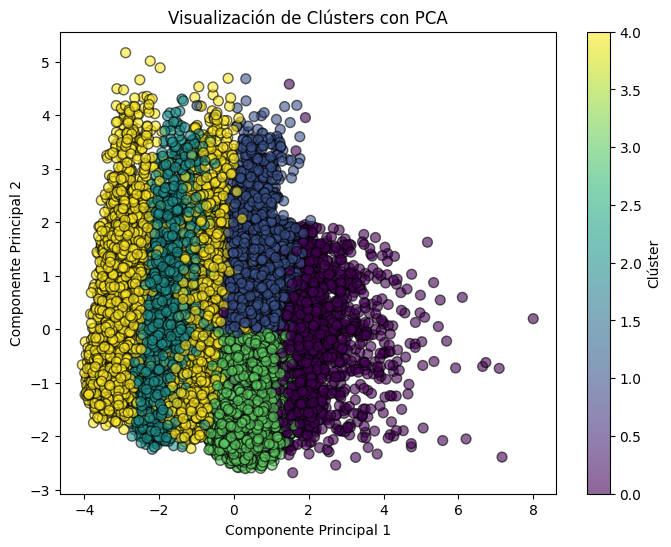

In [194]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a dos dimensiones
X_pca = pca.fit_transform(X_encoded_scaled_1)

# Graficar los clústers
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Visualización de Clústers con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clúster')
plt.show()

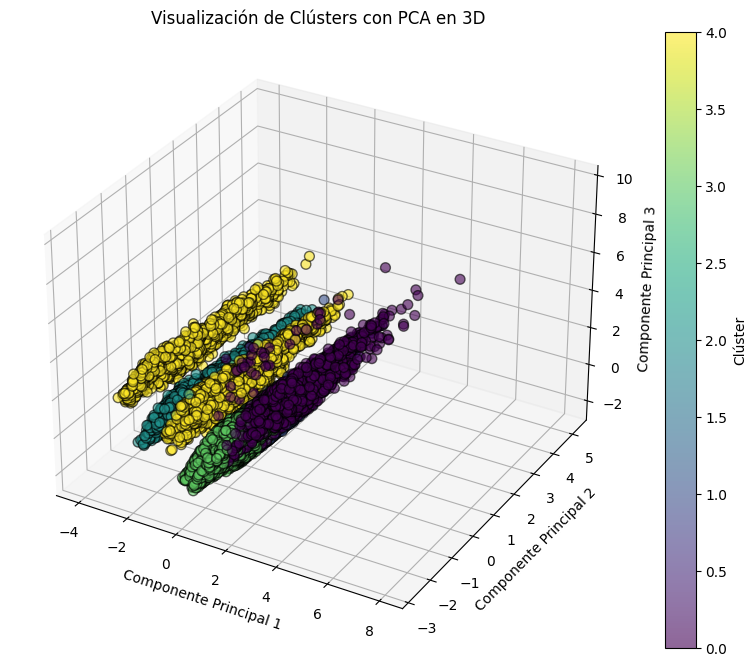

In [195]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importa las herramientas necesarias para gráficos 3D

# Reducir la dimensionalidad a tres componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_encoded_scaled_1)

# Graficar los clústers en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Configura un gráfico 3D

# Scatter plot para visualización 3D
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)

# Agregar títulos y etiquetas
ax.set_title('Visualización de Clústers con PCA en 3D')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Agregar la barra de colores para indicar la leyenda de los clústers
cbar = fig.colorbar(scatter)
cbar.set_label('Clúster')

# Mostrar el gráfico
plt.show()

Se puede apreciar que hay 3 clústeres diferenciados según la imagen PCA en 3 dimnesiones, lo que se contrapone a los resultados de las métricas el coeficiente de silueta o el índice Calinski-Harabasz, asi que se decide una clusterizacion de 3.

In [223]:
# Asegúrate de que el encoder está ajustado
encoder.fit(X_full[cat_cols_1])

# Genera nombres personalizados de características categóricas
feature_names_categorical = []
for i, cat in enumerate(cat_cols_1):
    labels = encoder.categories_[i]
    feature_names_categorical.extend([f"{cat}_{label}" for label in labels])

In [224]:
# Combina los nombres de características numéricas y categóricas codificadas
feature_names = list(num_cols_1) + feature_names_categorical

# Asegúrate de que el número de nombres coincide con las características transformadas
print(len(feature_names), X_encoded_scaled_1.shape[1])

69 69


In [225]:
# Asegurarse de que el PCA está ajustado correctamente
pca = PCA(n_components=3)  # O ajusta a un número menor si hay menos características que componentes
pca.fit(X_encoded_scaled_1)

# Extraer y preparar las cargas de PCA
loadings = pca.components_.T
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pca.n_components)], index=feature_names)

print(loading_matrix)

                           PC1       PC2       PC3
age                  -0.010068 -0.020938 -0.005816
day                   0.024417 -0.003189 -0.048385
campaign              0.003381  0.005235 -0.002403
previous              0.005323  0.014599 -0.000992
subscribed           -0.013764 -0.005239  0.041419
...                        ...       ...       ...
dia_semana_Saturday   0.075421  0.803344 -0.014209
dia_semana_Sunday     0.295833 -0.051817  0.667298
dia_semana_Thursday   0.367252 -0.013830  0.516243
dia_semana_Tuesday   -0.665717  0.074545  0.243417
dia_semana_Wednesday -0.406045  0.110989  0.350324

[69 rows x 3 columns]


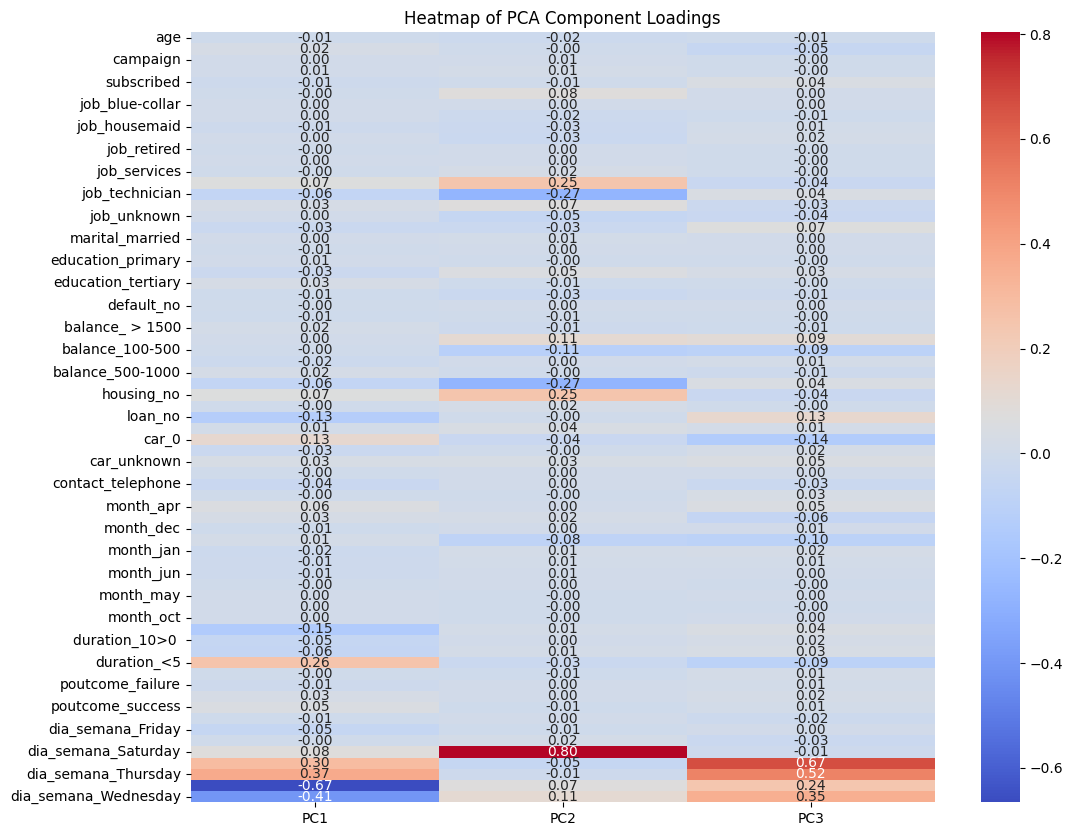

In [226]:
import seaborn as sns

# Crear un heatmap para visualizar las cargas de los componentes principales
plt.figure(figsize=(12, 10))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of PCA Component Loadings')
plt.show()

In [196]:
from sklearn.cluster import KMeans

# Suponemos que X_encoded_scaled_1 es tu conjunto de datos preprocesado
kmeans = KMeans(n_clusters=3, random_state=42) # Numero clusters de 3
cluster_labels = kmeans.fit_predict(X_encoded_scaled_1)

# Agregar las etiquetas de clúster al DataFrame original para análisis
X_full['Cluster'] = cluster_labels

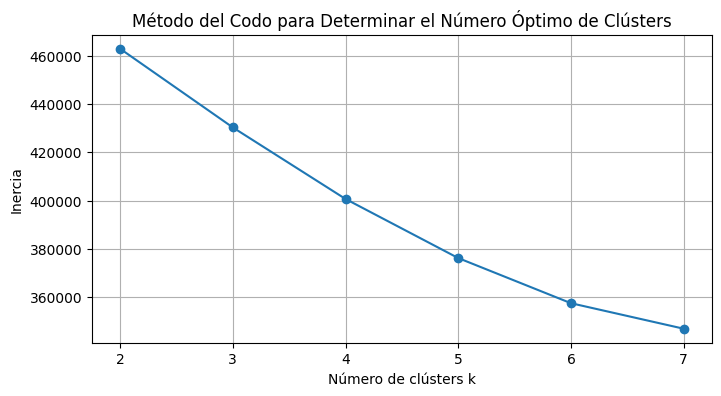

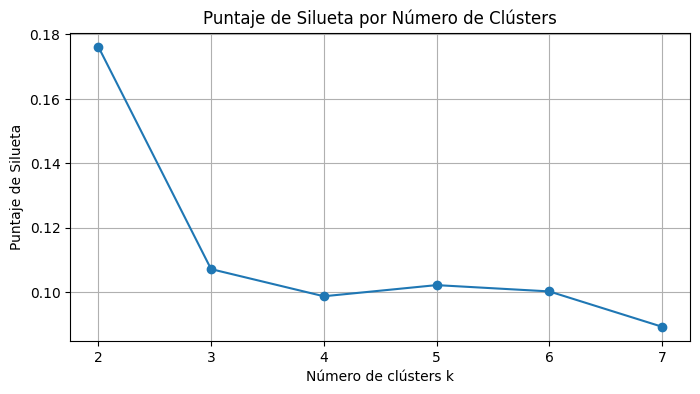

In [202]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de valores k para probar
range_n_clusters = np.arange(2, 8)
inertias = []
silhouette_scores = []

for num in range_n_clusters:
    kmeans = KMeans(n_clusters=num, random_state=42)
    cluster_labels = kmeans.fit_predict(X_encoded_scaled_1)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_encoded_scaled_1, cluster_labels))

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertias, marker='o')
plt.xlabel('Número de clústers k')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústers')
plt.grid(True)
plt.show()

# Graficar los scores de silueta
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de clústers k')
plt.ylabel('Puntaje de Silueta')
plt.title('Puntaje de Silueta por Número de Clústers')
plt.grid(True)
plt.show()

### X_ELIMINATED

In [198]:
range_n_clusters = np.arange(2, 8)

for num in range_n_clusters:
  kmeans = KMeans(n_clusters=num, random_state=42)
  cluster_labels = kmeans.fit_predict(X_encoded_scaled_2)

# Agregar las etiquetas de clúster al DataFrame original para análisis
X_full['Cluster'] = cluster_labels

In [199]:
# Agrupar datos por clúster
cluster_summary = X_full.groupby('Cluster')
print(cluster_summary)

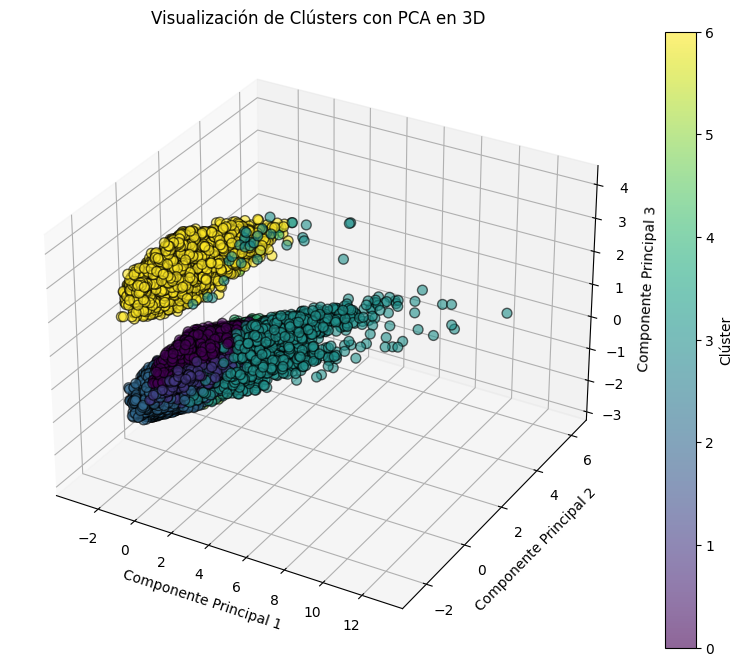

In [201]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importa las herramientas necesarias para gráficos 3D

# Reducir la dimensionalidad a tres componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_encoded_scaled_2)

# Graficar los clústers en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Configura un gráfico 3D

# Scatter plot para visualización 3D
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)

# Agregar títulos y etiquetas
ax.set_title('Visualización de Clústers con PCA en 3D')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Agregar la barra de colores para indicar la leyenda de los clústers
cbar = fig.colorbar(scatter)
cbar.set_label('Clúster')

# Mostrar el gráfico
plt.show()

Se puede apreciar que hay 2 clústeres diferenciados según la imagen PCA en 3 dimnesiones, lo que coincide con los resultados de las métricas el coeficiente de silueta o el índice Calinski-Harabasz, asi que se decide una clusterizacion de 2.

In [227]:
# Asegúrate de que el encoder está ajustado
encoder.fit(X_full[cat_cols_2])

# Genera nombres personalizados de características categóricas
feature_names_categorical = []
for i, cat in enumerate(cat_cols_2):
    labels = encoder.categories_[i]
    feature_names_categorical.extend([f"{cat}_{label}" for label in labels])

In [228]:
# Combina los nombres de características numéricas y categóricas codificadas
feature_names = list(num_cols_2) + feature_names_categorical

# Asegúrate de que el número de nombres coincide con las características transformadas
print(len(feature_names), X_encoded_scaled_2.shape[1])

61 61


In [229]:
# Asegurarse de que el PCA está ajustado correctamente
pca = PCA(n_components=3)  # O ajusta a un número menor si hay menos características que componentes
pca.fit(X_encoded_scaled_2)

# Extraer y preparar las cargas de PCA
loadings = pca.components_.T
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pca.n_components)], index=feature_names)

print(loading_matrix)

                           PC1       PC2       PC3
age                  -0.005233 -0.023913  0.002969
day                   0.016665 -0.033635 -0.063843
campaign              0.001108  0.003554 -0.004704
subscribed            0.000383  0.015545 -0.006513
job_admin.           -0.001788  0.012022  0.052444
...                        ...       ...       ...
dia_semana_Saturday  -0.024333  0.010654 -0.021631
dia_semana_Sunday    -0.088078  0.843433 -0.323175
dia_semana_Thursday   0.603756  0.143471  0.403729
dia_semana_Tuesday    0.643958  0.157665  0.125031
dia_semana_Wednesday -0.425612  0.231494  0.759266

[61 rows x 3 columns]


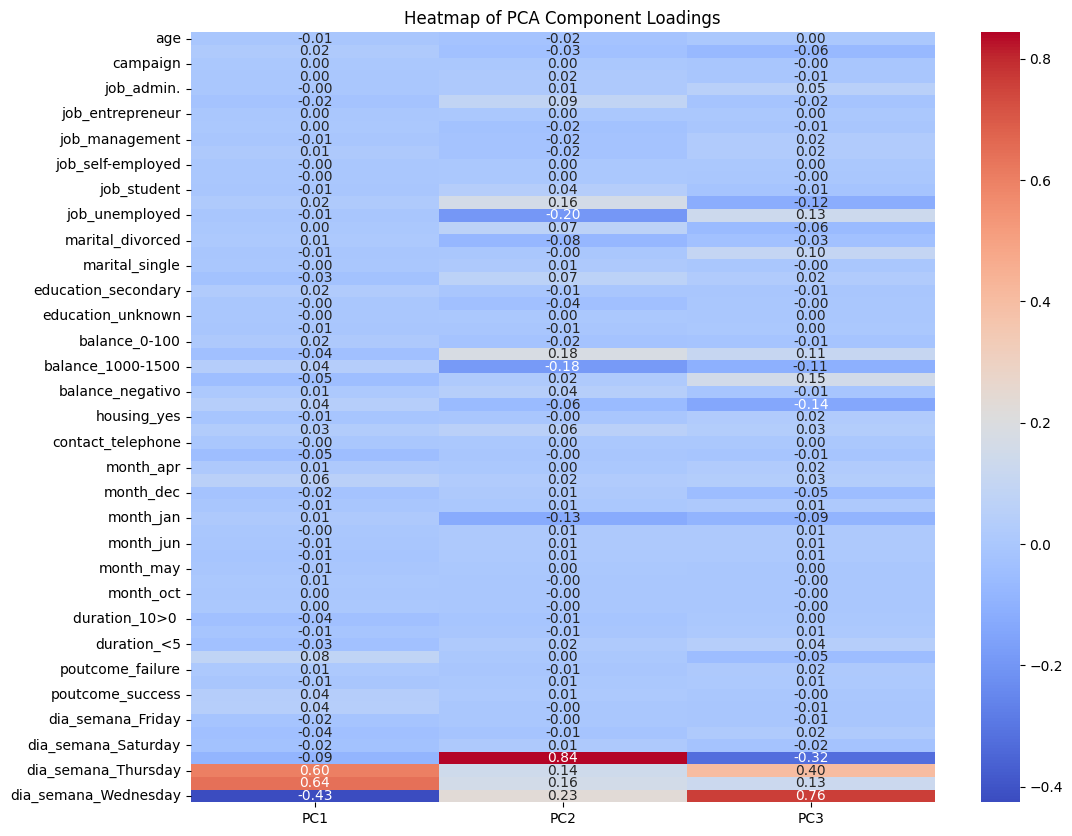

In [230]:
import seaborn as sns

# Crear un heatmap para visualizar las cargas de los componentes principales
plt.figure(figsize=(12, 10))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of PCA Component Loadings')
plt.show()

In [203]:
from sklearn.cluster import KMeans

# Suponemos que X_encoded_scaled_1 es tu conjunto de datos preprocesado
kmeans = KMeans(n_clusters=2, random_state=42) # numero clusters de 2
cluster_labels = kmeans.fit_predict(X_encoded_scaled_1)

# Agregar las etiquetas de clúster al DataFrame original para análisis
X_full['Cluster'] = cluster_labels

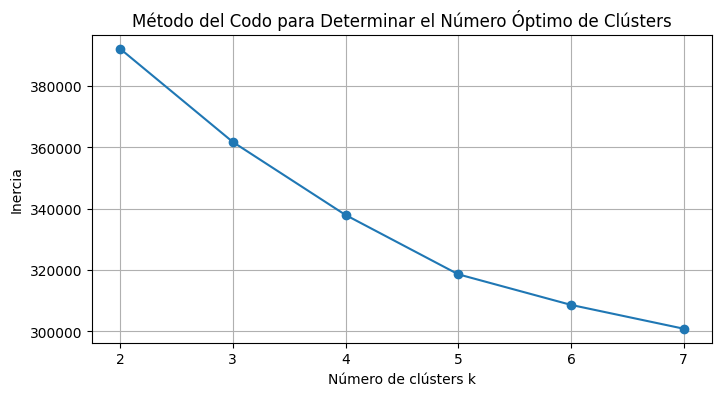

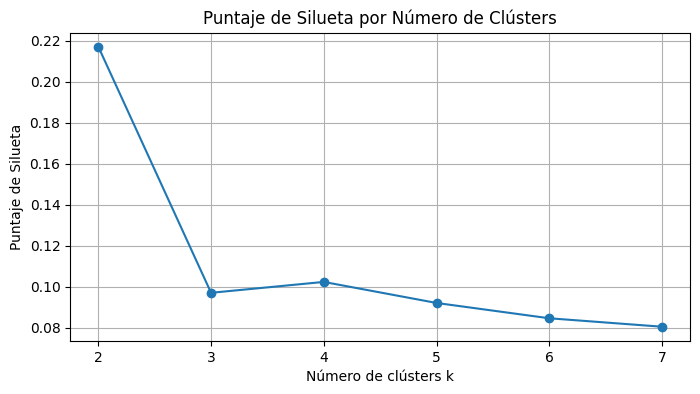

In [205]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de valores k para probar
range_n_clusters = np.arange(2, 8)
inertias = []
silhouette_scores = []

for num in range_n_clusters:
    kmeans = KMeans(n_clusters=num, random_state=42)
    cluster_labels = kmeans.fit_predict(X_encoded_scaled_2)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_encoded_scaled_2, cluster_labels))

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertias, marker='o')
plt.xlabel('Número de clústers k')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústers')
plt.grid(True)
plt.show()

# Graficar los scores de silueta
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de clústers k')
plt.ylabel('Puntaje de Silueta')
plt.title('Puntaje de Silueta por Número de Clústers')
plt.grid(True)
plt.show()

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_relationships(data, cluster_col):
    """
    Plots the relationship between each numerical variable in the dataframe and the cluster labels.

    Parameters:
        data (DataFrame): The dataframe containing the data.
        cluster_col (str): The column name in the dataframe that contains the cluster labels.
    """
    # Identificar columnas numéricas
    numeric_cols = data.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns
    # Crear gráficos para cada variable numérica
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=cluster_col, y=col, data=data)
        plt.title(f'Relationship between {col} and Cluster Labels')
        plt.xlabel('Cluster Label')
        plt.ylabel(col)
        plt.show()

        # Mostrar estadísticas descriptivas por clúster
        print(f"Descriptive statistics for {col} by cluster:")
        print(data.groupby(cluster_col)[col].describe())

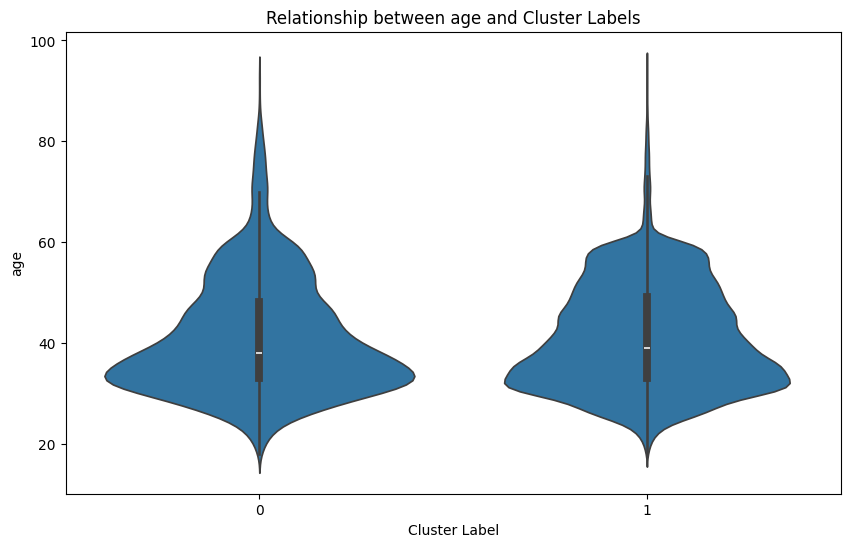

Descriptive statistics for age by cluster:
           count       mean        std   min   25%   50%   75%   max
Cluster                                                             
0         8206.0  40.964904  11.437539  18.0  33.0  38.0  48.0  93.0
1        36508.0  40.967733  10.444311  18.0  33.0  39.0  49.0  95.0


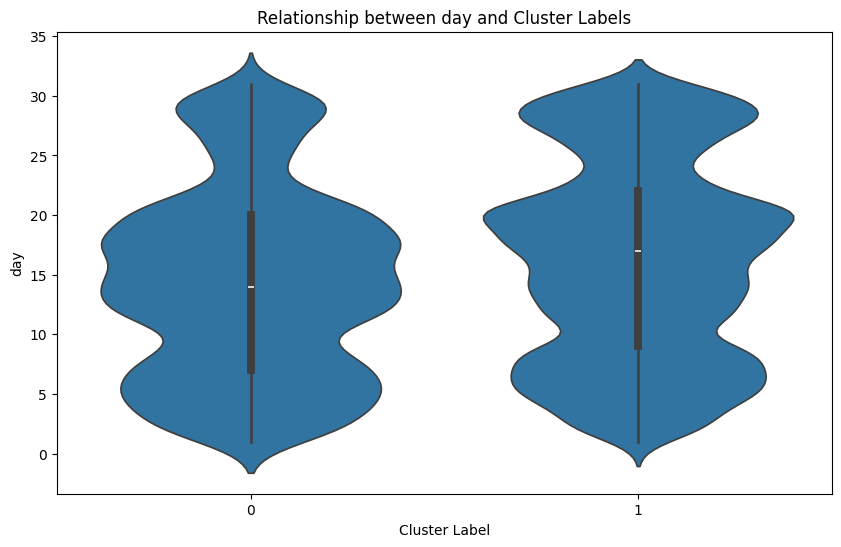

Descriptive statistics for day by cluster:
           count       mean       std  min  25%   50%   75%   max
Cluster                                                          
0         8206.0  14.269193  7.911041  1.0  7.0  14.0  20.0  31.0
1        36508.0  16.149584  8.378408  1.0  9.0  17.0  22.0  31.0


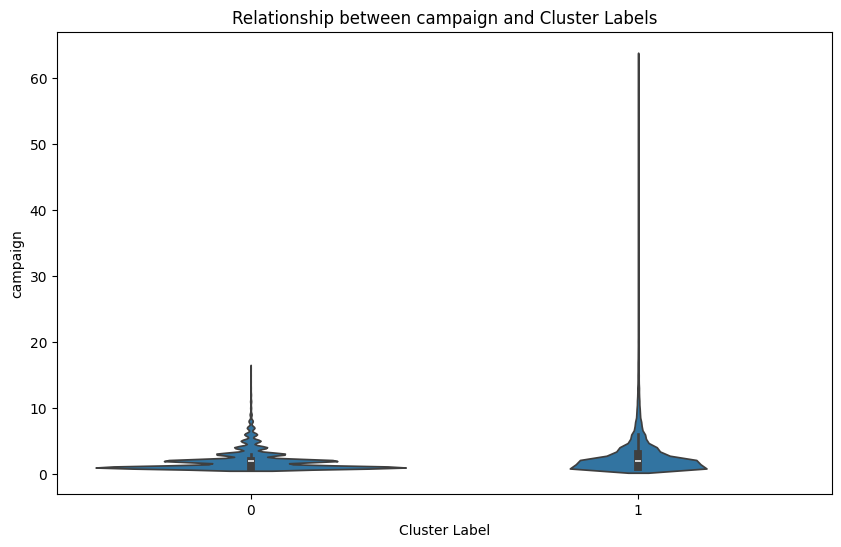

Descriptive statistics for campaign by cluster:
           count      mean       std  min  25%  50%  75%   max
Cluster                                                       
0         8206.0  2.059712  1.563787  1.0  1.0  2.0  2.0  16.0
1        36508.0  2.936945  3.340047  1.0  1.0  2.0  3.0  63.0


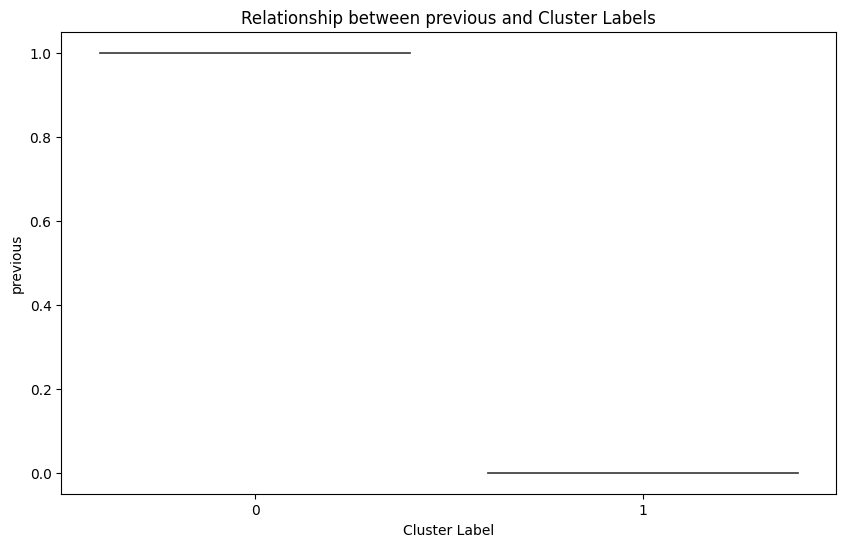

Descriptive statistics for previous by cluster:
           count  mean  std  min  25%  50%  75%  max
Cluster                                             
0         8206.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
1        36508.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


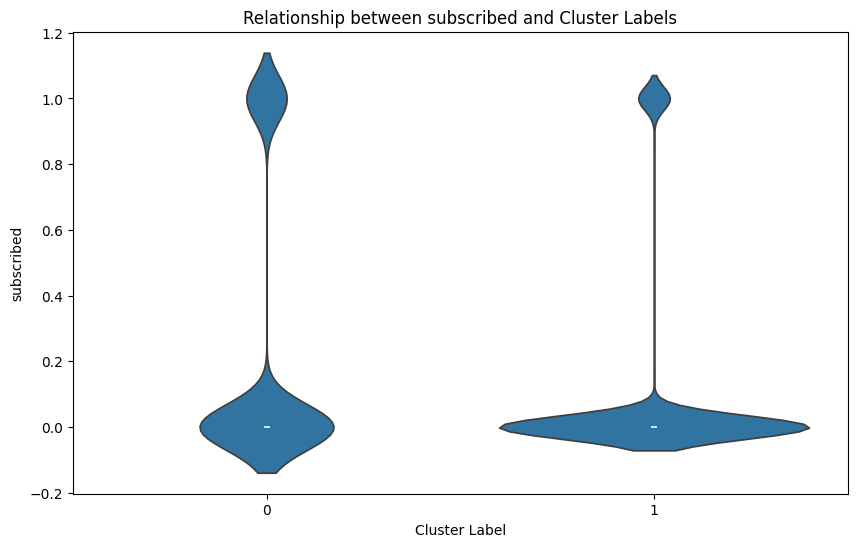

Descriptive statistics for subscribed by cluster:
           count      mean       std  min  25%  50%  75%  max
Cluster                                                      
0         8206.0  0.231294  0.421686  0.0  0.0  0.0  0.0  1.0
1        36508.0  0.092528  0.289773  0.0  0.0  0.0  0.0  1.0


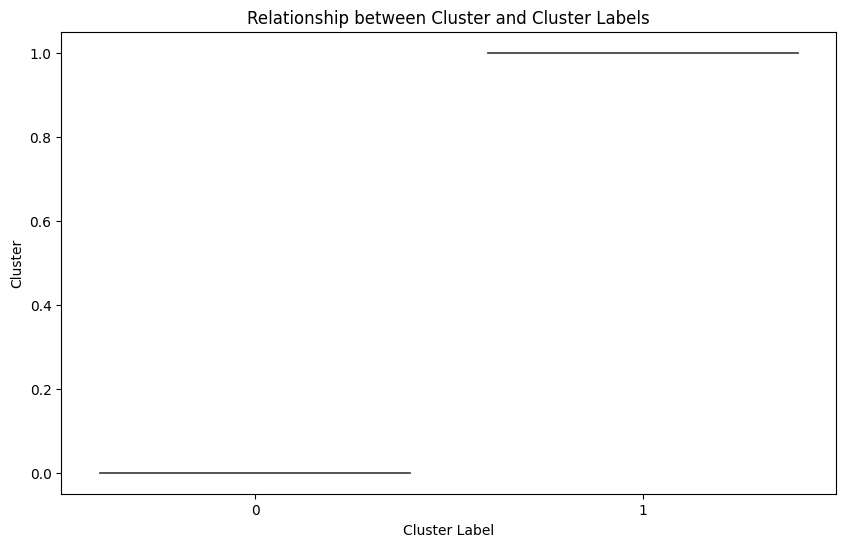

Descriptive statistics for Cluster by cluster:
           count  mean  std  min  25%  50%  75%  max
Cluster                                             
0         8206.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        36508.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0


In [207]:
plot_cluster_relationships(X_full, 'Cluster')